# UNIVARIATE TIME SERIES ANALYSIS AND FORECASTING OF SINALOA'S FISH PRODUCTION

## 1. ABOUT THE PROJECT

**Author**: Fernando A. Martinez Urrutia
**Date**: 2022/07/13

As a Data Analysts | Scientist we use data as our source of power. If knowledge is power and data is knowledge, then by logic data is power!…But **every power comes with great responsibility**. Let's imagine for a moment that you're the secretariat of natural resources of your country…what information would you like to know about the different sectors that you run? What decisions would you make based on the data presented to you? What programs would you invest or stop investing in?…THAT is the power of data, and no sector is excuse from it, not even the fish one.

While in 2014 Mexico occupied the 4th rank in fishing volume globally , it was until 2019 that the fishing industry remained stangnant and conformed for the 17th position, in spite of the fact that mexican littoral zones are more extensive than those of the countries that occupy the top positions in global fish production [1]. Therefore the importance in analyzing through an exploratory data analysis mexican fish production as well as an analysis of sinaloa's data, top producer state in Mexico. 

**Objective**: 
In this project I'll analyze the mexican fishing industry over the period of 2017-2020 in order to detect major trends and answer general questions about the data. After an intial exploratory data analysis, an univariate Deep Learning model will be used to best predict the monetary production of the most productive state.

**About the data:** 
This data set is composed by 4 csv tables from the mexican fishing production from the years of 2017 to 2020; reported by CONAPESCA (National Comission of Fishing and Aquaculture). Giving a total dataframe of 312,700 entries, each with 12 attributes from where we'll use only the columns:
- family of fish
- States
- Production value (Mx pesos)
- unembarked fish (kg)
- Live fish captured before unembarking (kg)
- Year
- Month
- Origin

*"Produccion Pesquera, Datos y Recursos", published by CONAPESCA. Obtained from https://datos.gob.mx/busca/dataset/produccion-pesquera. the 2021-01-20*

**Tools used:** regex, pandas, numpy, seaborn, 

Data preprocess: concatenation, regex, numpy, pandas, 
Data visualization: Interactive dashboard, infographic, heatmaps, 
Exploratory Data Analysis, Data Cleaning, Data Visualization.
Qualitative analysis: Boxplots, plots, 
Quantitative analysis: stadistical descriptors



##  2. DATA PREPROCESS

### 2.1. Data Extraction

For our analysis we will use data from the years 2017 to 2020. Please download the .csv files from the data section. 

In [1]:
import pandas as pd
import numpy as np

we now turn the CSV files to dataframes using the pandas library and concatenated them into a single dataframe called "df"

In [2]:
df2017=pd.read_csv('data/Produccion_Pesquera_2017.csv',encoding='latin-1')
df2018=pd.read_csv('data/Produccion_Pesquera_2018.csv',encoding='latin-1')
df2019=pd.read_csv('data/Produccion_Pesquera_2019.csv',encoding='latin-1')
df2020=pd.read_csv('data/Produccion_Pesquera_2020.csv',encoding='latin-1')
df=pd.concat([df2017, df2018,df2019,df2020],axis=0)
display(df.head(20))


c:\Users\fer-h\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\fer-h\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


EJERCICIO FISCAL   ENTIDAD FEDERATIVA         NOMBRE OFICINA MES DE CORTE  \
0             2017.0      BAJA CALIFORNIA             SAN FELIPE        JULIO   
1             2017.0      BAJA CALIFORNIA             SAN FELIPE        JULIO   
2             2017.0  BAJA CALIFORNIA SUR         BAHIA ASUNCION       AGOSTO   
3             2017.0  BAJA CALIFORNIA SUR          SANTA ROSALIA    NOVIEMBRE   
4             2017.0               COLIMA                TECOMAN      FEBRERO   
5             2017.0             CAMPECHE                 ATASTA    NOVIEMBRE   
6             2017.0             CAMPECHE               CAMPECHE        ENERO   
7             2017.0             CAMPECHE               CAMPECHE        ABRIL   
8             2017.0             CAMPECHE               CAMPECHE         MAYO   
9             2017.0             CAMPECHE              CHAMPOTON         MAYO   
10            2017.0             CAMPECHE              CHAMPOTON        JUNIO   
11            2017.0             CAMPECHE             ISLA ARENA   SEPTIEMBRE   
12            2017.0             CAMPECHE             ISLA ARENA    NOVIEMBRE   
13            2017.0             CAMPECHE               SABANCUY      OCTUBRE   
14            2017.0             CAMPECHE             SEYBAPLAYA        ENERO   
15            2017.0             GUERRERO  MARQUELIA CRUZ GRANDE    NOVIEMBRE   
16            2017.0             GUERRERO  MARQUELIA CRUZ GRANDE    NOVIEMBRE   
17            2017.0              JALISCO        PUERTO VALLARTA      FEBRERO   
18            2017.0              JALISCO        PUERTO VALLARTA        ABRIL   
19            2017.0              JALISCO        PUERTO VALLARTA         MAYO   

     ORIGEN NOMBRE COMUN PESO DESEMBARCADO KILOGRAMOS PESO VIVO KILOGRAMOS  \
0   CAPTURA      ABADEJO                           94                 94.0   
1   CAPTURA      ABADEJO                         1400               1540.0   
2   CAPTURA      ABADEJO                         4397               4397.0   
3   CAPTURA      ABADEJO                           17                 17.0   
4   CAPTURA      ABADEJO                         4587               4587.0   
5   CAPTURA      ABADEJO                         4406               4406.0   
6   CAPTURA      ABADEJO                           18                 18.0   
7   CAPTURA      ABADEJO                          103                103.0   
8   CAPTURA      ABADEJO                          189                189.0   
9   CAPTURA      ABADEJO                           52                 52.0   
10  CAPTURA      ABADEJO                           37                 37.0   
11  CAPTURA      ABADEJO                         2280               2280.0   
12  CAPTURA      ABADEJO                           13                 13.0   
13  CAPTURA      ABADEJO                           77                 77.0   
14  CAPTURA      ABADEJO                        40016              40016.0   
15  CAPTURA      ABADEJO                          221                221.0   
16  CAPTURA      ABADEJO                         1100               1210.0   
17  CAPTURA      ABADEJO                          155                155.0   
18  CAPTURA      ABADEJO                          240                240.0   
19  CAPTURA      ABADEJO                          430                430.0   

    VALOR PESOS NOMBRE PRINCIPAL  CLAVE DE ENTIDAD  CLAVE DE OFICINA  
0     3119.6928             MERO               2.0             207.0  
1         46424             MERO               2.0             207.0  
2     159567.13             MERO               3.0             313.0  
3        616.93             MERO               3.0             312.0  
4     166462.23             MERO               6.0             602.0  
5   159899.1835             MERO               4.0             410.0  
6      611.6664             MERO               4.0             401.0  
7     3525.9621             MERO               4.0             401.0  
8     6578.2216         

### 2.2 Data Cleaning

#### 2.2.1 DataFrame Insight

The first step we want to take is to known our data.
what type of data we have?, how much data we have? and to obtain it's main metrics. 

In [3]:
display (df.shape)
display(df.info(show_counts=True))
display(df.describe(include='all'))

(312752, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312752 entries, 0 to 63235
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   EJERCICIO FISCAL              251440 non-null  float64
 1   ENTIDAD FEDERATIVA            251440 non-null  object 
 2   NOMBRE OFICINA                251440 non-null  object 
 3   MES DE CORTE                  251440 non-null  object 
 4   ORIGEN                        251440 non-null  object 
 5   NOMBRE COMUN                  251440 non-null  object 
 6   PESO DESEMBARCADO KILOGRAMOS  251440 non-null  object 
 7   PESO VIVO KILOGRAMOS          251440 non-null  object 
 8   VALOR PESOS                   251440 non-null  object 
 9   NOMBRE PRINCIPAL              251440 non-null  object 
 10  CLAVE DE ENTIDAD              251440 non-null  float64
 11  CLAVE DE OFICINA              251440 non-null  float64
dtypes: float64(3), object(9)
memory usage: 31.0+ 

None

EJERCICIO FISCAL   ENTIDAD FEDERATIVA NOMBRE OFICINA MES DE CORTE  \
count      251440.000000               251440         251440       251440   
unique               NaN                   31            157           12   
top                  NaN  BAJA CALIFORNIA SUR       ENSENADA        MARZO   
freq                 NaN                31614           5571        22339   
mean         2018.489449                  NaN            NaN          NaN   
std             1.124732                  NaN            NaN          NaN   
min          2017.000000                  NaN            NaN          NaN   
25%          2017.000000                  NaN            NaN          NaN   
50%          2018.000000                  NaN            NaN          NaN   
75%          2020.000000                  NaN            NaN          NaN   
max          2020.000000                  NaN            NaN          NaN   

         ORIGEN NOMBRE COMUN PESO DESEMBARCADO KILOGRAMOS  \
count    251440       251440                       251440   
unique        2          675                        67919   
top     CAPTURA   TILAPIA SE                          100   
freq     230078        10935                         1438   
mean        NaN          NaN                          NaN   
std         NaN          NaN                          NaN   
min         NaN          NaN                          NaN   
25%         NaN          NaN                          NaN   
50%         NaN          NaN                          NaN   
75%         NaN          NaN                          NaN   
max         NaN          NaN                          NaN   

       PESO VIVO KILOGRAMOS VALOR PESOS NOMBRE PRINCIPAL  CLAVE DE ENTIDAD  \
count                251440      251440           251440     251440.000000   
unique                77851      170970               57               NaN   
top                       0       6,000            OTRAS               NaN   
freq                   1250         247            48999               NaN   
mean                    NaN         NaN              NaN         17.789373   
std                     NaN         NaN              NaN         10.575871   
min                     NaN         NaN              NaN          1.000000   
25%                     NaN         NaN              NaN          4.000000   
50%                     NaN         NaN              NaN         20.000000   
75%                     NaN         NaN              NaN         27.000000   
max                     NaN         NaN              NaN         32.000000   

        CLAVE DE OFICINA  
count      251440.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean         1784.014067  
std          1058.024604  
min           101.000000  
25%           410.000000  
50%          2004.000000  
75%          2705.000000  
max          3201.000000

- note how we have 312,752 rows but only 251,440 from those are not null.
- Summary stadistics were calculated for 'EJERCICIO FISCAL' (year),'CLAVE DE OFICINA'(office's code) and 'CLAVE DE ENTIDAD'(state's code) although they should be categorical values.
- Note how we have 2 type of data types: objects and float values. 
- The stadistical descriptors were not calculated for the numerical columns, meaning they must contain mixed data or strings; this will be solved in the following cells. 

#### 2.2.2 Renaming columns and dropping columns that will not be used

In [4]:
#rename columns and data frame and deletion of the 2 last columns which will not be used. 
df = df.rename(columns={'ENTIDAD FEDERATIVA':'STATE','EJERCICIO FISCAL':'YEAR','NOMBRE OFICINA':'OFFICE',"NOMBRE PRINCIPAL":'FAMILY',"NOMBRE COMUN":'SPECIE',"MES DE CORTE":"MONTH","VALOR PESOS":"PROFIT","PESO VIVO KILOGRAMOS":"LIVE_CAPTURED_KG","PESO DESEMBARCADO KILOGRAMOS":"UNEMBARKED_KG","ORIGEN":"ORIGIN"}).drop(columns=['CLAVE DE ENTIDAD','CLAVE DE OFICINA'])
df.head(10)

YEAR                STATE          OFFICE      MONTH   ORIGIN   SPECIE  \
0  2017.0      BAJA CALIFORNIA      SAN FELIPE      JULIO  CAPTURA  ABADEJO   
1  2017.0      BAJA CALIFORNIA      SAN FELIPE      JULIO  CAPTURA  ABADEJO   
2  2017.0  BAJA CALIFORNIA SUR  BAHIA ASUNCION     AGOSTO  CAPTURA  ABADEJO   
3  2017.0  BAJA CALIFORNIA SUR   SANTA ROSALIA  NOVIEMBRE  CAPTURA  ABADEJO   
4  2017.0               COLIMA         TECOMAN    FEBRERO  CAPTURA  ABADEJO   
5  2017.0             CAMPECHE          ATASTA  NOVIEMBRE  CAPTURA  ABADEJO   
6  2017.0             CAMPECHE        CAMPECHE      ENERO  CAPTURA  ABADEJO   
7  2017.0             CAMPECHE        CAMPECHE      ABRIL  CAPTURA  ABADEJO   
8  2017.0             CAMPECHE        CAMPECHE       MAYO  CAPTURA  ABADEJO   
9  2017.0             CAMPECHE       CHAMPOTON       MAYO  CAPTURA  ABADEJO   

  UNEMBARKED_KG LIVE_CAPTURED_KG       PROFIT FAMILY  
0            94             94.0    3119.6928   MERO  
1          1400           1540.0        46424   MERO  
2          4397           4397.0    159567.13   MERO  
3            17             17.0       616.93   MERO  
4          4587           4587.0    166462.23   MERO  
5          4406           4406.0  159899.1835   MERO  
6            18             18.0     611.6664   MERO  
7           103            103.0    3525.9621   MERO  
8           189            189.0    6578.2216   MERO  
9            52             52.0     1767.647   MERO

#### 2.2.3 Treating missing values and Mixed Dtypes

Given that somes numerical columns are expressed with commas, they will be read as strings. That is the reason behind why the previous stadistical descriptors did not work in the columns, to solve this problem we can remove all commas from numbers using **regex**. 
we will also drop the empty rows and replace NaN values with zeroes

In [5]:
#drop rows in which all data is missing and reset the index
df=df.dropna(how='all').reset_index(drop=True)
display(df)
#eliminate commas from all columns
df = df.replace(',','', regex=True)
display(df)
# transforming string or float values to numbers
cols = ['LIVE_CAPTURED_KG', 'UNEMBARKED_KG', 'PROFIT','YEAR']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#replace NaN with O values
df['YEAR'] = df['YEAR'].replace(np.nan, 0)
df['UNEMBARKED_KG'] = df["UNEMBARKED_KG"].replace(np.nan, 0)
df['LIVE_CAPTURED_KG']= df['LIVE_CAPTURED_KG'].replace(np.nan, 0)
df['PROFIT'] = df['PROFIT'].replace(np.nan, 0)

YEAR                STATE          OFFICE      MONTH       ORIGIN  \
0       2017.0      BAJA CALIFORNIA      SAN FELIPE      JULIO      CAPTURA   
1       2017.0      BAJA CALIFORNIA      SAN FELIPE      JULIO      CAPTURA   
2       2017.0  BAJA CALIFORNIA SUR  BAHIA ASUNCION     AGOSTO      CAPTURA   
3       2017.0  BAJA CALIFORNIA SUR   SANTA ROSALIA  NOVIEMBRE      CAPTURA   
4       2017.0               COLIMA         TECOMAN    FEBRERO      CAPTURA   
...        ...                  ...             ...        ...          ...   
251435  2020.0               PUEBLA          PUEBLA     AGOSTO  ACUACULTURA   
251436  2020.0               PUEBLA          PUEBLA    OCTUBRE  ACUACULTURA   
251437  2020.0               PUEBLA          PUEBLA  NOVIEMBRE  ACUACULTURA   
251438  2020.0               PUEBLA          PUEBLA  DICIEMBRE  ACUACULTURA   
251439  2020.0             VERACRUZ        VERACRUZ      MARZO  ACUACULTURA   

           SPECIE UNEMBARKED_KG LIVE_CAPTURED_KG     PROFIT  FAMILY  
0         ABADEJO            94             94.0  3119.6928    MERO  
1         ABADEJO          1400           1540.0      46424    MERO  
2         ABADEJO          4397           4397.0  159567.13    MERO  
3         ABADEJO            17             17.0     616.93    MERO  
4         ABADEJO          4587           4587.0  166462.23    MERO  
...           ...           ...              ...        ...     ...  
251435  TRUCHA SE         1,984            1,984    150,139  TRUCHA  
251436  TRUCHA SE         3,100            3,100    211,463  TRUCHA  
251437  TRUCHA SE           484              484     36,477  TRUCHA  
251438  TRUCHA SE        16,615           16,615  1,208,277  TRUCHA  
251439  TRUCHA SE           248              248     17,340  TRUCHA  

[251440 rows x 10 columns]

YEAR                STATE          OFFICE      MONTH       ORIGIN  \
0       2017.0      BAJA CALIFORNIA      SAN FELIPE      JULIO      CAPTURA   
1       2017.0      BAJA CALIFORNIA      SAN FELIPE      JULIO      CAPTURA   
2       2017.0  BAJA CALIFORNIA SUR  BAHIA ASUNCION     AGOSTO      CAPTURA   
3       2017.0  BAJA CALIFORNIA SUR   SANTA ROSALIA  NOVIEMBRE      CAPTURA   
4       2017.0               COLIMA         TECOMAN    FEBRERO      CAPTURA   
...        ...                  ...             ...        ...          ...   
251435  2020.0               PUEBLA          PUEBLA     AGOSTO  ACUACULTURA   
251436  2020.0               PUEBLA          PUEBLA    OCTUBRE  ACUACULTURA   
251437  2020.0               PUEBLA          PUEBLA  NOVIEMBRE  ACUACULTURA   
251438  2020.0               PUEBLA          PUEBLA  DICIEMBRE  ACUACULTURA   
251439  2020.0             VERACRUZ        VERACRUZ      MARZO  ACUACULTURA   

           SPECIE UNEMBARKED_KG LIVE_CAPTURED_KG     PROFIT  FAMILY  
0         ABADEJO            94             94.0  3119.6928    MERO  
1         ABADEJO          1400           1540.0      46424    MERO  
2         ABADEJO          4397           4397.0  159567.13    MERO  
3         ABADEJO            17             17.0     616.93    MERO  
4         ABADEJO          4587           4587.0  166462.23    MERO  
...           ...           ...              ...        ...     ...  
251435  TRUCHA SE          1984             1984     150139  TRUCHA  
251436  TRUCHA SE          3100             3100     211463  TRUCHA  
251437  TRUCHA SE           484              484      36477  TRUCHA  
251438  TRUCHA SE         16615            16615    1208277  TRUCHA  
251439  TRUCHA SE           248              248      17340  TRUCHA  

[251440 rows x 10 columns]

as we can observe the shape of our dataframe consists in 251440 rows and 10 columns. 
Numbers with commas are now integers. 
Now we'll check that we have eliminated any NaN values in our dataframe:

In [6]:
print("NaN in YEAR",df['YEAR'].isnull().sum())
print("NaN in UNEMBARKED_KG",df['UNEMBARKED_KG'].isnull().sum())
print("NaN in LIVE_CAPTURED_KG",df['LIVE_CAPTURED_KG'].isnull().sum())
print("NaN in PROFIT",df['PROFIT'].isnull().sum())
print("NaN in YEAR",df['YEAR'].isnull().values.any())
print("NaN in UNEMBARKED_KG",df['UNEMBARKED_KG'].isnull().values.any())
print("NaN in LIVE_CAPTURED_KG",df['LIVE_CAPTURED_KG'].isnull().values.any())
print("NaN in PROFIT",df['PROFIT'].isnull().values.any())


NaN in YEAR 0
NaN in UNEMBARKED_KG 0
NaN in LIVE_CAPTURED_KG 0
NaN in PROFIT 0
NaN in YEAR False
NaN in UNEMBARKED_KG False
NaN in LIVE_CAPTURED_KG False
NaN in PROFIT False


#### 2.2.4 Dropping duplicate columns

In [7]:
df=df.drop_duplicates()

from looking our dataframe shape, we see that there were a couple of row which were duplicated.

#### 2.2.5. classify of columns between categories and numbers

In [8]:
#transform numerical colums to int64
columns=['LIVE_CAPTURED_KG', 'UNEMBARKED_KG', 'PROFIT']
df[columns]=df[columns].astype(np.int64)
#transform objects to categories
for col in ['STATE', 'MONTH', 'ORIGIN','SPECIE','FAMILY','OFFICE']:df[col] = df[col].astype("category")
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251368 entries, 0 to 251439
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   YEAR              251368 non-null  float64 
 1   STATE             251368 non-null  category
 2   OFFICE            251368 non-null  category
 3   MONTH             251368 non-null  category
 4   ORIGIN            251368 non-null  category
 5   SPECIE            251368 non-null  category
 6   UNEMBARKED_KG     251368 non-null  int64   
 7   LIVE_CAPTURED_KG  251368 non-null  int64   
 8   PROFIT            251368 non-null  int64   
 9   FAMILY            251368 non-null  category
dtypes: category(6), float64(1), int64(3)
memory usage: 11.5 MB


None

#### 2.2.6 turning dataframe into time series

In [9]:
#turn  strings of month to format 01-10 to later concatenate with year column
df["MONTH"].replace({'ENERO':"01","FEBRERO":"02","MARZO":"03","ABRIL":'04',"MAYO":"05","JUNIO":"06","JULIO":"07","AGOSTO":"08","SEPTIEMBRE":"09","OCTUBRE":"10","NOVIEMBRE":"11","DICIEMBRE":"12"},inplace=True)
#convert float values of year to int and latter to interger, as we cannot convert floats "2017.0" to string directly
df["YEAR"]=df["YEAR"].astype(np.int64)
#convert year column to string to be able to concatenate with the month and day
df["YEAR"]=df["YEAR"].astype(str)
#concatenate month and date with year column
df["DATE"]=df[["YEAR","MONTH"]].apply(lambda x: "-".join(x), axis =1)
# turn to timeseries format
df["DATE"]= pd.to_datetime(df["DATE"],format='%Y-%m', errors='coerce')
# even though we have the date in timeseries format, for the exploratory analysis 
# we'll be keeping the year and month in separate columnsn which will faciliate the analysis
# as we will set the date as our index 
df["YEAR"]=df["DATE"].dt.year
df["MONTH"]=df["DATE"].dt.month
df["YEAR"]=df["YEAR"].astype("category")
df["MONTH"]=df["MONTH"].astype("category")

display(df)

YEAR                STATE          OFFICE MONTH       ORIGIN  \
0       2017      BAJA CALIFORNIA      SAN FELIPE     7      CAPTURA   
1       2017      BAJA CALIFORNIA      SAN FELIPE     7      CAPTURA   
2       2017  BAJA CALIFORNIA SUR  BAHIA ASUNCION     8      CAPTURA   
3       2017  BAJA CALIFORNIA SUR   SANTA ROSALIA    11      CAPTURA   
4       2017               COLIMA         TECOMAN     2      CAPTURA   
...      ...                  ...             ...   ...          ...   
251435  2020               PUEBLA          PUEBLA     8  ACUACULTURA   
251436  2020               PUEBLA          PUEBLA    10  ACUACULTURA   
251437  2020               PUEBLA          PUEBLA    11  ACUACULTURA   
251438  2020               PUEBLA          PUEBLA    12  ACUACULTURA   
251439  2020             VERACRUZ        VERACRUZ     3  ACUACULTURA   

           SPECIE  UNEMBARKED_KG  LIVE_CAPTURED_KG   PROFIT  FAMILY       DATE  
0         ABADEJO             94                94     3119    MERO 2017-07-01  
1         ABADEJO           1400              1540    46424    MERO 2017-07-01  
2         ABADEJO           4397              4397   159567    MERO 2017-08-01  
3         ABADEJO             17                17      616    MERO 2017-11-01  
4         ABADEJO           4587              4587   166462    MERO 2017-02-01  
...           ...            ...               ...      ...     ...        ...  
251435  TRUCHA SE           1984              1984   150139  TRUCHA 2020-08-01  
251436  TRUCHA SE           3100              3100   211463  TRUCHA 2020-10-01  
251437  TRUCHA SE            484               484    36477  TRUCHA 2020-11-01  
251438  TRUCHA SE          16615             16615  1208277  TRUCHA 2020-12-01  
251439  TRUCHA SE            248               248    17340  TRUCHA 2020-03-01  

[251368 rows x 11 columns]

we'll run the statisticals descriptors to check that they work only in numerical columns.

In [10]:
df_fishing_2017_2020=df
df_fishing_2017_2020.describe(include="all")

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\1684448048.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_fishing_2017_2020.describe(include="all")


YEAR                STATE    OFFICE     MONTH   ORIGIN  \
count   251368.0               251368    251368  251368.0   251368   
unique       4.0                   31       157      12.0        2   
top       2017.0  BAJA CALIFORNIA SUR  ENSENADA       3.0  CAPTURA   
freq     64320.0                31614      5571   22329.0   230072   
first        NaN                  NaN       NaN       NaN      NaN   
last         NaN                  NaN       NaN       NaN      NaN   
mean         NaN                  NaN       NaN       NaN      NaN   
std          NaN                  NaN       NaN       NaN      NaN   
min          NaN                  NaN       NaN       NaN      NaN   
25%          NaN                  NaN       NaN       NaN      NaN   
50%          NaN                  NaN       NaN       NaN      NaN   
75%          NaN                  NaN       NaN       NaN      NaN   
max          NaN                  NaN       NaN       NaN      NaN   

            SPECIE  UNEMBARKED_KG  LIVE_CAPTURED_KG        PROFIT  FAMILY  \
count       251368   2.513680e+05      2.513680e+05  2.513680e+05  251368   
unique         675            NaN               NaN           NaN      57   
top     TILAPIA SE            NaN               NaN           NaN   OTRAS   
freq         10934            NaN               NaN           NaN   48996   
first          NaN            NaN               NaN           NaN     NaN   
last           NaN            NaN               NaN           NaN     NaN   
mean           NaN   2.990742e+04      3.242771e+04  6.670599e+05     NaN   
std            NaN   4.191943e+05      4.636078e+05  9.508176e+06     NaN   
min            NaN   0.000000e+00      0.000000e+00  0.000000e+00     NaN   
25%            NaN   2.800000e+02      2.890000e+02  6.463000e+03     NaN   
50%            NaN   1.319000e+03      1.387000e+03  3.200000e+04     NaN   
75%            NaN   6.101250e+03      6.474000e+03  1.537525e+05     NaN   
max            NaN   5.789263e+07      5.789263e+07  1.300189e+09     NaN   

                       DATE  
count                251368  
unique                   48  
top     2017-03-01 00:00:00  
freq                   5814  
first   2017-01-01 00:00:00  
last    2020-12-01 00:00:00  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

As we can observe now only the numerical columns are the ones with statistical descriptors

### 2.3 Saving Processed Dataframe

In [11]:
df_fishing_2017_2020.to_csv("data/df_fishing_2017_2020.csv", index=False)

## 3. EXPLORATORY DATA ANALYSIS

**Questions to answer:**
- Which state is the one with the biggest fish production
- What type of origin is more profitable: fishing or aquaculture
- Most profitable family of fish in Mexico
- What are some  major and minor trends in sesonality
- Mexico's fish production (mx peso) by year 

### 3.1 dowload libraries

In [12]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### 3.2 Automated EDA reports

#### 3.2.1 online EDA report using SweetViz

Sweetviz is a library that automatize a EDA report, this library automaticly will show the report in your default browser

In [13]:
%pip install sweetviz
import sweetviz as sv
analyze_report=sv.analyze(df_fishing_2017_2020)
analyze_report.show_html('EDA Report.html',open_browser=True)

Note: you may need to restart the kernel to use updated packages.


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report EDA Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.2.2 panda profiling

In [14]:
import pandas_profiling as pp
pp.__version__
report = pp.ProfileReport(df_fishing_2017_2020)
report.to_notebook_iframe()
report.to_file("data/PANDASPROFILE_REPORT.html")

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 66.84it/s]


### 3.3 Statistical descriptors

"Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values
Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided."
We have already cleaned our data from mixed types and NaN values, so we should have no problem running the describe function. 

In [15]:
# given results are given in floats, scientific notation is used, we use the .round() method
display(df_fishing_2017_2020.describe(include="all").round(2))

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\572631344.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df_fishing_2017_2020.describe(include="all").round(2))


YEAR                STATE    OFFICE     MONTH   ORIGIN  \
count   251368.0               251368    251368  251368.0   251368   
unique       4.0                   31       157      12.0        2   
top       2017.0  BAJA CALIFORNIA SUR  ENSENADA       3.0  CAPTURA   
freq     64320.0                31614      5571   22329.0   230072   
first        NaN                  NaN       NaN       NaN      NaN   
last         NaN                  NaN       NaN       NaN      NaN   
mean         NaN                  NaN       NaN       NaN      NaN   
std          NaN                  NaN       NaN       NaN      NaN   
min          NaN                  NaN       NaN       NaN      NaN   
25%          NaN                  NaN       NaN       NaN      NaN   
50%          NaN                  NaN       NaN       NaN      NaN   
75%          NaN                  NaN       NaN       NaN      NaN   
max          NaN                  NaN       NaN       NaN      NaN   

            SPECIE  UNEMBARKED_KG  LIVE_CAPTURED_KG        PROFIT  FAMILY  \
count       251368      251368.00         251368.00  2.513680e+05  251368   
unique         675            NaN               NaN           NaN      57   
top     TILAPIA SE            NaN               NaN           NaN   OTRAS   
freq         10934            NaN               NaN           NaN   48996   
first          NaN            NaN               NaN           NaN     NaN   
last           NaN            NaN               NaN           NaN     NaN   
mean           NaN       29907.42          32427.71  6.670599e+05     NaN   
std            NaN      419194.27         463607.83  9.508176e+06     NaN   
min            NaN           0.00              0.00  0.000000e+00     NaN   
25%            NaN         280.00            289.00  6.463000e+03     NaN   
50%            NaN        1319.00           1387.00  3.200000e+04     NaN   
75%            NaN        6101.25           6474.00  1.537525e+05     NaN   
max            NaN    57892626.00       57892626.00  1.300189e+09     NaN   

                       DATE  
count                251368  
unique                   48  
top     2017-03-01 00:00:00  
freq                   5814  
first   2017-01-01 00:00:00  
last    2020-12-01 00:00:00  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

### 3.4 Visual seasonal analysis

In [16]:
profit=df_fishing_2017_2020.groupby(['YEAR','MONTH']).sum()
display(profit)

UNEMBARKED_KG  LIVE_CAPTURED_KG      PROFIT
YEAR MONTH                                             
2017 1          117725654         127096692  1760067381
     2          130469225         139849970  1916802851
     3          174159590         188584371  2046044975
     4          163373836         175925631  1874681255
     5          177780823         193591859  1710457007
     6          202247795         218020040  2621031211
     7          193710733         207442347  3253347383
     8          148809982         156825428  3821227818
     9          134617223         142533801  4250638551
     10         175949062         187073458  6505414877
     11         217759771         233130498  5799232611
     12         171127487         184778612  4221247838
2018 1          151098081         165922832  2359843912
     2          146729848         160432692  2274836879
     3          171370164         186557700  2394160584
     4          183277911         200090698  2379561198
     5          182638679         200959387  2415264190
     6          229628596         245004728  3033415877
     7          216596907         231374374  3733841407
     8          128710710         136358565  3500360434
     9          118759949         125978374  4047592652
     10         142731546         151401914  6108457355
     11         185355825         199381474  5897385096
     12         141929704         156168616  3583713917
2019 1          105474239         115966905  2477184294
     2          110795297         122133296  2400241601
     3          158230304         175407264  3091067290
     4          158068203         172627722  2411198095
     5          156665201         172752107  2494900314
     6          199583011         216971134  2683625207
     7          203627844         219457699  3677415941
     8          117995617         124846987  3645787709
     9          108144274         113662931  4383420808
     10         144596022         155288706  6624283398
     11         158209132         171261332  5292070640
     12         113494490         126418548  3049717456
2020 1          112759835         125117171  2653616131
     2          114691888         126989729  2519445053
     3          147963616         164482968  2460539331
     4          171928167         192069974  2219114063
     5          172898440         193332678  2052431247
     6          186186769         204865704  2734106544
     7          138367698         147830740  3942997695
     8          108716028         115980192  3546922296
     9          111656656         119131426  4268968993
     10         158055726         170851772  6372178960
     11         175016747         192290734  6453205631
     12         178082955         197066946  4714451669

#### 3.4.1 National Production(MX peso) throughout the years

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\542030658.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


MONTH           1           2           3           4           5           6  \
YEAR                                                                            
2017   1760067381  1916802851  2046044975  1874681255  1710457007  2621031211   
2018   2359843912  2274836879  2394160584  2379561198  2415264190  3033415877   
2019   2477184294  2400241601  3091067290  2411198095  2494900314  2683625207   
2020   2653616131  2519445053  2460539331  2219114063  2052431247  2734106544   

MONTH           7           8           9          10          11          12  
YEAR                                                                           
2017   3253347383  3821227818  4250638551  6505414877  5799232611  4221247838  
2018   3733841407  3500360434  4047592652  6108457355  5897385096  3583713917  
2019   3677415941  3645787709  4383420808  6624283398  5292070640  3049717456  
2020   3942997695  3546922296  4268968993  6372178960  6453205631  4714451669

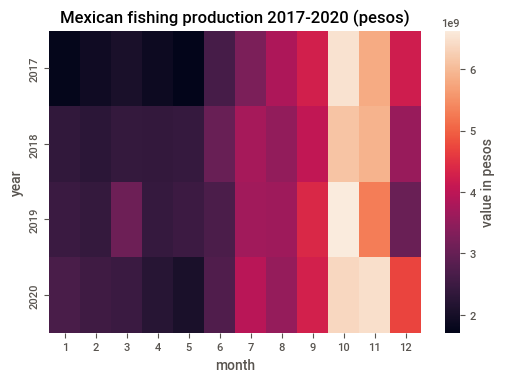

In [17]:

sales=df_fishing_2017_2020.groupby(["YEAR","MONTH"]).sum()
sales_year_month_peso= sales.reset_index().pivot(index='YEAR',columns="MONTH", values='PROFIT')
sns.heatmap(sales_year_month_peso,cbar_kws={"label":'value in pesos'})
plt.title("Mexican fishing production 2017-2020 (pesos)")
plt.xlabel("month")
plt.ylabel("year")
plt.show()
display(sales_year_month_peso)


#### 3.4.2 Fish captured (kg) and seasonality

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\3611836646.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


MONTH          1          2          3          4          5          6  \
YEAR                                                                      
2017   117725654  130469225  174159590  163373836  177780823  202247795   
2018   151098081  146729848  171370164  183277911  182638679  229628596   
2019   105474239  110795297  158230304  158068203  156665201  199583011   
2020   112759835  114691888  147963616  171928167  172898440  186186769   

MONTH          7          8          9         10         11         12  
YEAR                                                                     
2017   193710733  148809982  134617223  175949062  217759771  171127487  
2018   216596907  128710710  118759949  142731546  185355825  141929704  
2019   203627844  117995617  108144274  144596022  158209132  113494490  
2020   138367698  108716028  111656656  158055726  175016747  178082955

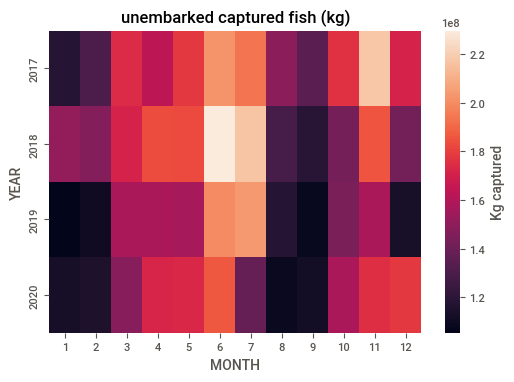

In [18]:
# calculation of live kg produced
life_kg=df_fishing_2017_2020.groupby(["YEAR","MONTH"]).sum()
life_kg= life_kg.reset_index().pivot(index='YEAR',columns="MONTH", values='UNEMBARKED_KG')
sns.heatmap(life_kg,cbar_kws={"label":'Kg captured'})
plt.title('unembarked captured fish (kg)')
plt.xlabel("MONTH")
plt.ylabel("YEAR")
plt.show()
display(life_kg)

Although summer is the season in which more fishes are collected, the product value for the monetary production obtained in months like october and november is higher. Meaning that in october and november more high value fish are capture eventhough the production is not as high.  

### 3.5 Production by type of fish

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\2476469448.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


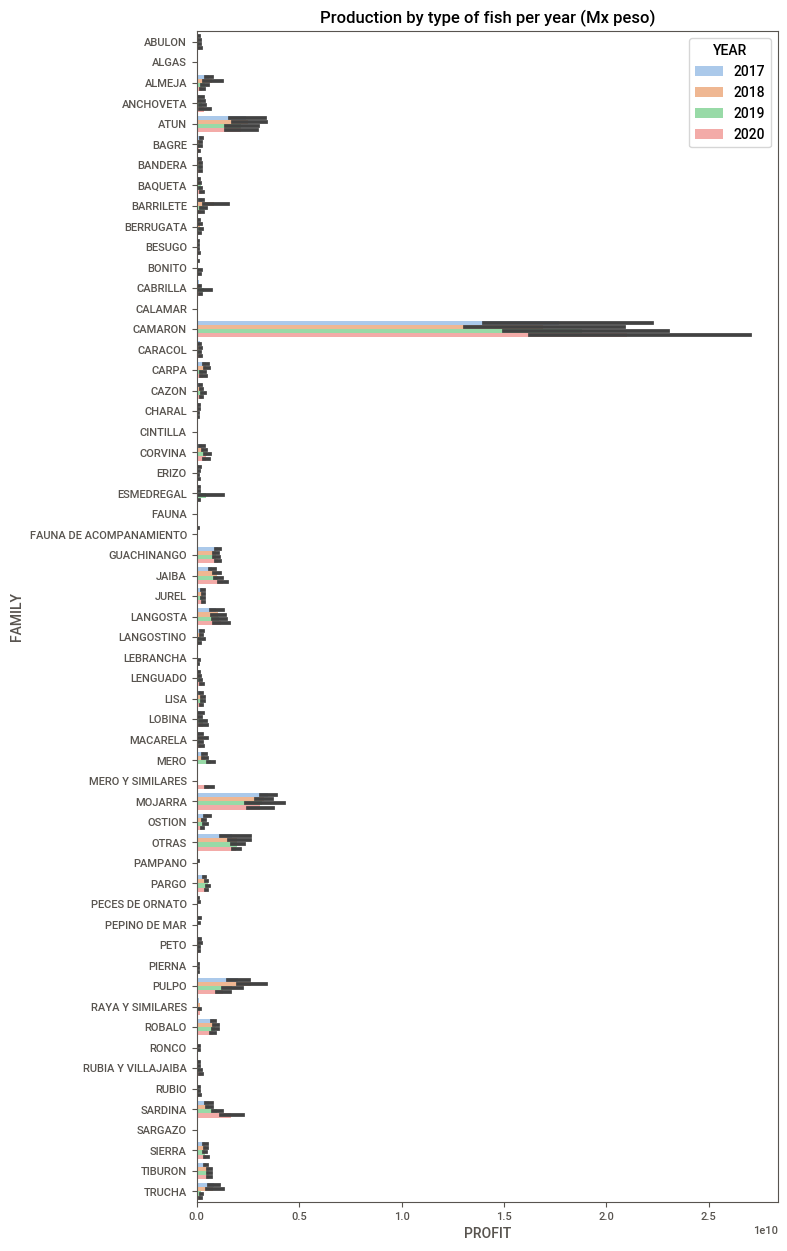

In [19]:
plt.rcParams["figure.figsize"] = [7.50, 15.50]
sns.barplot(x="PROFIT", y="FAMILY", hue='YEAR', palette="pastel",data=df_fishing_2017_2020,estimator=sum)
plt.title("Production by type of fish per year (Mx peso)")
plt.show()

we can obseve that during the past 4 years, most of the production has come from shrimp, tunna, and tilapia, shrimp occupying the 1st position. Now that we know that shrimps are number one production, we will analyze which are the top shrimp producer states. 

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\1162231694.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


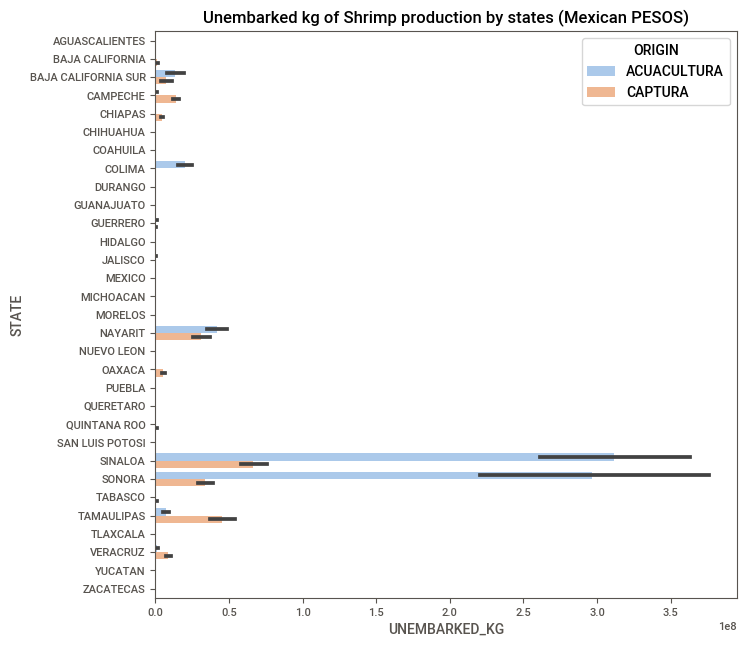

In [20]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
sns.barplot(x="UNEMBARKED_KG", y="STATE", hue='ORIGIN', palette="pastel",data=df_fishing_2017_2020.loc[df_fishing_2017_2020["FAMILY"]=="CAMARON"],estimator=sum)
plt.title("Unembarked kg of Shrimp production by states (Mexican PESOS)")
plt.show()

### 3.6 Fishing method comparison

given that our dataframe is big, we'll need to take a sample for visualization purposes only

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\3409913145.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


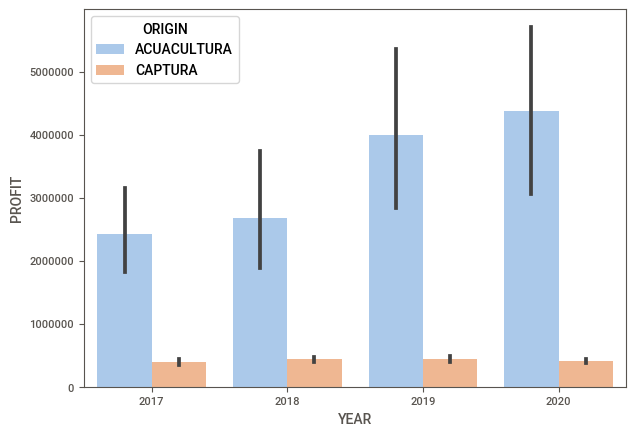

In [21]:
perc=.50
df_subset=df_fishing_2017_2020.sample(n=int(df_fishing_2017_2020.shape[0]*perc))
plt.rcParams["figure.figsize"] = [7, 5]
sns.barplot(x="YEAR", y="PROFIT",hue="ORIGIN", palette="pastel",data=df_subset)
plt.show()


Most profit of the mexican fish industry appears to come from aquaculture instead of wild captured. This is interesting and consistent if we consider that the national fishing product is shrimp, a family that can be easily breed. 

### 3.7 Wasted production (Live captured fish vs unembarked fish (Kg))

to analyze 

In [22]:
a=df_fishing_2017_2020.set_index("DATE")

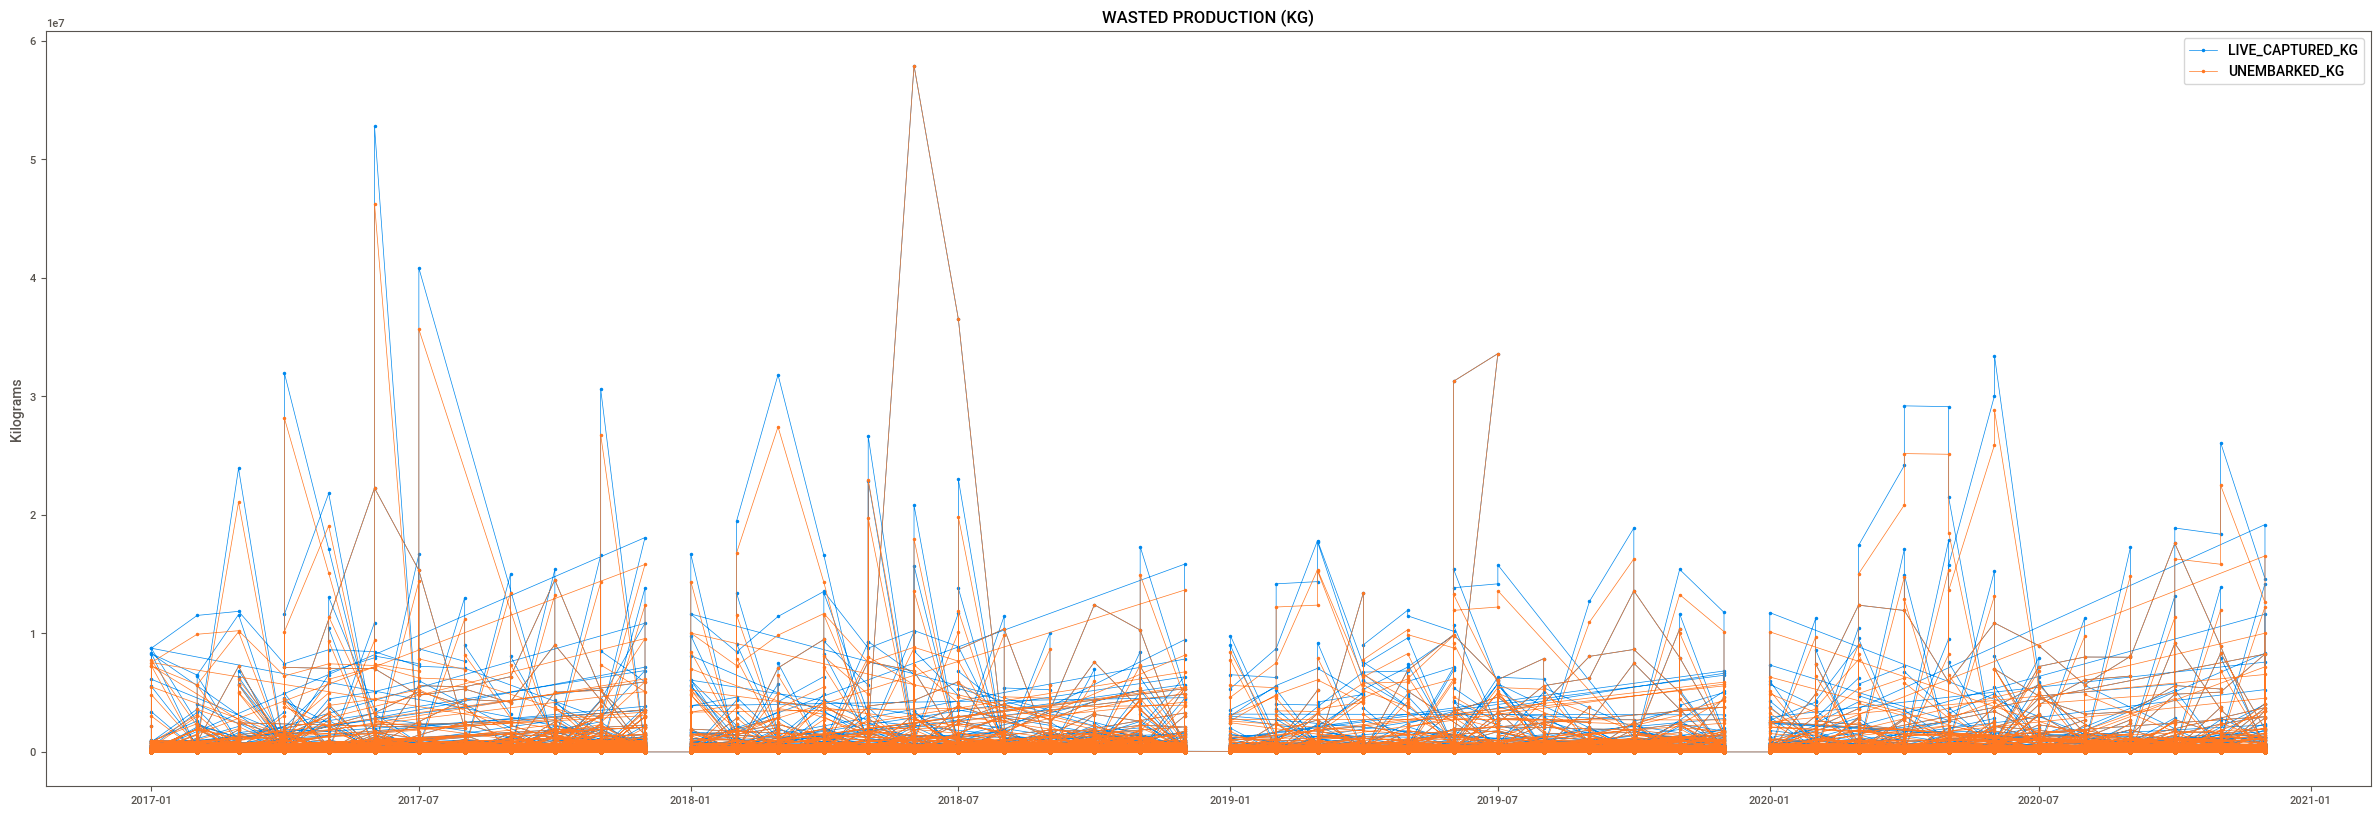

In [23]:
fig, ax = plt.subplots(figsize=(30, 10))
cols_plot =["LIVE_CAPTURED_KG", "UNEMBARKED_KG"]
for nm in cols_plot:
    a
    ax.plot(a[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Kilograms')
    ax.set_title('WASTED PRODUCTION (KG)');

### 3.8 National and state total production

### 3.9 Most productive state analysis

given that we are interested in the total production by state over the perios (2017-2020) we need to get the total sum and not the average as the average is the default.

In [24]:
most_productive=df_fishing_2017_2020.groupby("STATE")['PROFIT',"STATE"].sum().sort_values(by="PROFIT",ascending=False)
display(most_productive)
yearly_production=df_fishing_2017_2020.groupby("YEAR")["PROFIT"].sum()
display(yearly_production)

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\3293763169.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_productive=df_fishing_2017_2020.groupby("STATE")['PROFIT',"STATE"].sum().sort_values(by="PROFIT",ascending=False)


PROFIT
STATE                           
SINALOA              43737378599
SONORA               36064356703
NAYARIT              12972646258
BAJA CALIFORNIA SUR  10835921012
YUCATAN               8678264872
BAJA CALIFORNIA       8348010806
TAMAULIPAS            6814379801
CAMPECHE              6796683125
VERACRUZ              6572068321
CHIAPAS               5074173668
TABASCO               3950919330
JALISCO               3391918997
COLIMA                3164082450
GUERRERO              2254178989
MICHOACAN             2050876687
OAXACA                1829234794
MEXICO                1435004886
QUINTANA ROO          1074290384
HIDALGO               1017581193
PUEBLA                 633265436
SAN LUIS POTOSI        222069325
ZACATECAS              121145115
MORELOS                111919343
CHIHUAHUA               93607811
COAHUILA                90486772
QUERETARO               89791591
DURANGO                 85793067
NUEVO LEON              71049494
GUANAJUATO              56248311
TLAXCALA                25608577
AGUASCALIENTES          14561908

YEAR
2017    39780193758
2018    41728433501
2019    42230912753
2020    43937977613
Name: PROFIT, dtype: int64

c:\Users\fer-h\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*, block=None)>

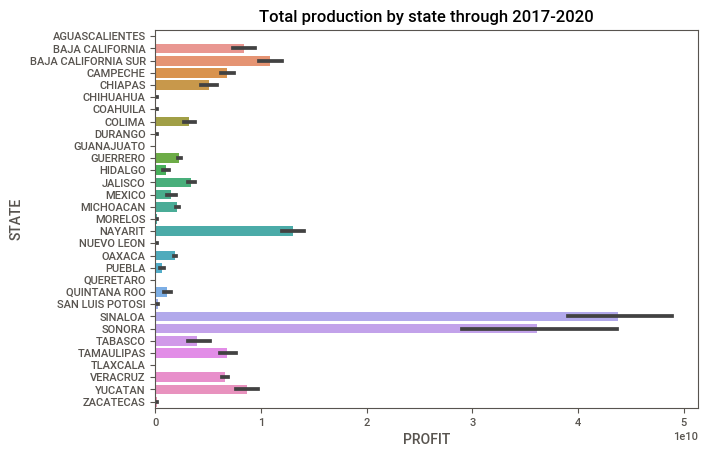

In [25]:
sns.barplot(df_fishing_2017_2020["PROFIT"],df_fishing_2017_2020["STATE"],estimator=sum)
plt.title("Total production by state through 2017-2020")
plt.show


In [26]:
sinaloa_production=df_fishing_2017_2020.loc[df_fishing_2017_2020["STATE"]=="SINALOA"]
sinaloa_production=sinaloa_production.groupby(["DATE"]).sum()
display(sinaloa_production)
sinaloa_production.to_csv("data/sinaloa_production.csv", index=True)


UNEMBARKED_KG  LIVE_CAPTURED_KG      PROFIT
DATE                                                   
2017-01-01       15290000          17181647   254643897
2017-02-01       18713536          21046068   266104712
2017-03-01       28354312          30922636   423068471
2017-04-01       22248385          23889970   253679234
2017-05-01       20767648          22160183   247114278
2017-06-01       24460879          25920471   674921470
2017-07-01       24879012          25999761   746585152
2017-08-01       25585554          26882344   933472698
2017-09-01       20011383          21216946   926795799
2017-10-01       24662750          26685459  1318361149
2017-11-01       33079227          35084012  1573713197
2017-12-01       29984472          31990968  1439943082
2018-01-01       18944378          21288539   330619590
2018-02-01       16309017          18145472   298788699
2018-03-01       26079233          28365138   411576822
2018-04-01       30391447          32683903   426109325
2018-05-01       22234812          23656869   346793422
2018-06-01       26522325          28071821   684864158
2018-07-01       36093907          37439301  1131304949
2018-08-01       27784866          28126660  1029219260
2018-09-01       21687265          22580929   948768660
2018-10-01       29733063          32232344  1528252827
2018-11-01       39862307          41721522  1988954586
2018-12-01       30858137          33065547  1494625226
2019-01-01       15416260          16875869   456689042
2019-02-01       17688958          19653687   431953995
2019-03-01       31046275          34400772   485045632
2019-04-01       30361861          31821894   414867535
2019-05-01       23144344          24689823   672379740
2019-06-01       34138522          35870246   926685159
2019-07-01       34930017          36113906  1235407996
2019-08-01       33851812          35090053  1011488873
2019-09-01       22562658          23018561  1047015639
2019-10-01       29604059          31345342  1727630598
2019-11-01       36617449          38715536  1797982094
2019-12-01       24144151          26004885  1007456707
2020-01-01       15997357          17938065   615536330
2020-02-01       20536344          22440048   574847130
2020-03-01       29549488          31875373   610511227
2020-04-01       33363305          35993727   488092802
2020-05-01       17979340          19312760   318450941
2020-06-01       32592909          34127104   855329505
2020-07-01       36968640          38146975  1372632255
2020-08-01       26613464          27771533   895489730
2020-09-01       25932692          26724973   989054282
2020-10-01       24918569          26496874  1541902254
2020-11-01       35343685          37339147  2685839383
2020-12-01       43371578          46487283  1896809087

In [27]:
sinaloa_production.describe(include="all")

UNEMBARKED_KG  LIVE_CAPTURED_KG        PROFIT
count   4.800000e+01      4.800000e+01  4.800000e+01
mean    2.690024e+07      2.863777e+07  9.111954e+08
std     6.860221e+06      7.018272e+06  5.558133e+08
min     1.529000e+07      1.687587e+07  2.471143e+08
25%     2.209793e+07      2.290915e+07  4.304928e+08
50%     2.630078e+07      2.792168e+07  8.754096e+08
75%     3.143293e+07      3.419552e+07  1.256146e+09
max     4.337158e+07      4.648728e+07  2.685839e+09

In [28]:
#sinaloa= df_fishing_2017_2020.groupby('STATE').filter(lambda x : pd.Series('SINALOA').isin(x['STATE']).all()).set_index("DATE")
#sinaloa=sinaloa.pivot


C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\1880110253.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


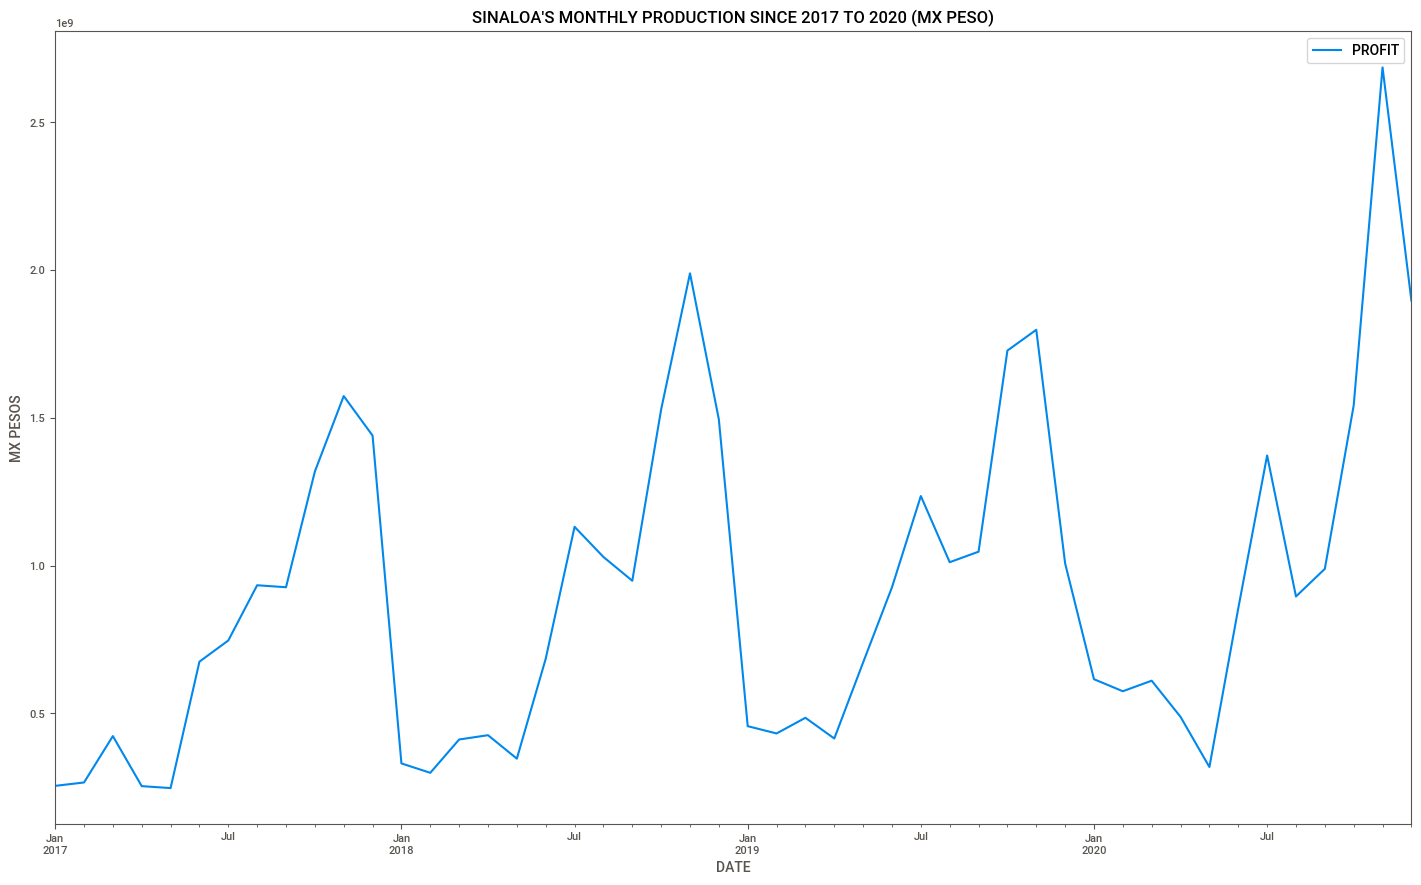

In [29]:
plt.rcParams["figure.figsize"] = [17.50, 10.50]
sinaloa_production.plot(y='PROFIT', use_index=True)
plt.title("SINALOA'S MONTHLY PRODUCTION SINCE 2017 TO 2020 (MX PESO)")
plt.xlabel("DATE")
plt.ylabel("MX PESOS")
plt.show()

### 3.10 EDA insights

Although summer is the season in which more fishes are collected (june and july), the product value for the production obtained in months like october and november is higher. Meaning that in october and november more high value fish are capture eventhough the production is not as high.  
If we analyze the trend by year we will notice that after 2018 the kg of fish produced declined drastically, however the revenue kept increasing. This might be hinting that new methods for fishing could have been implemented like aquaculture. 
This is coherent with the fact that aquaculture has increased specially with the breed of shrimp in sinaloa 


## 4. FORECASTING PROFIT OF SINALOA (MOST PRODUCTIVE STATE)

### 4.1 Model selection and tuning

#### 4.1.1 Seasonal decomposing

depomposition provides useful abstract model for thinking about time series and to understand our problem better.  Time series are composed by systematic elements (components that have recurrency and consistency;they can be model) and non systematic elements (components of the time series that cannot be directly model).
Sistematic components are classified into:
- Level: average values of serie
- Trend: the increasing or decreasing pattern in the data
- Seasonality: short term cycles of the series
- Noise: random variations of the series 
<br>
these components can be combined either by addition or multiplication.   
- **y(t) = Level + Trend + Seasonality + Noise**.
- **y(t) = Level * Trend * Seasonality * Noise**
 
 Additive is for linear trends while multiplicative model for non-linear

In [30]:
df=pd.read_csv("data/sinaloa_production.csv",index_col="DATE",parse_dates=True)
df.index.freq=("MS")
df

UNEMBARKED_KG  LIVE_CAPTURED_KG      PROFIT
DATE                                                   
2017-01-01       15290000          17181647   254643897
2017-02-01       18713536          21046068   266104712
2017-03-01       28354312          30922636   423068471
2017-04-01       22248385          23889970   253679234
2017-05-01       20767648          22160183   247114278
2017-06-01       24460879          25920471   674921470
2017-07-01       24879012          25999761   746585152
2017-08-01       25585554          26882344   933472698
2017-09-01       20011383          21216946   926795799
2017-10-01       24662750          26685459  1318361149
2017-11-01       33079227          35084012  1573713197
2017-12-01       29984472          31990968  1439943082
2018-01-01       18944378          21288539   330619590
2018-02-01       16309017          18145472   298788699
2018-03-01       26079233          28365138   411576822
2018-04-01       30391447          32683903   426109325
2018-05-01       22234812          23656869   346793422
2018-06-01       26522325          28071821   684864158
2018-07-01       36093907          37439301  1131304949
2018-08-01       27784866          28126660  1029219260
2018-09-01       21687265          22580929   948768660
2018-10-01       29733063          32232344  1528252827
2018-11-01       39862307          41721522  1988954586
2018-12-01       30858137          33065547  1494625226
2019-01-01       15416260          16875869   456689042
2019-02-01       17688958          19653687   431953995
2019-03-01       31046275          34400772   485045632
2019-04-01       30361861          31821894   414867535
2019-05-01       23144344          24689823   672379740
2019-06-01       34138522          35870246   926685159
2019-07-01       34930017          36113906  1235407996
2019-08-01       33851812          35090053  1011488873
2019-09-01       22562658          23018561  1047015639
2019-10-01       29604059          31345342  1727630598
2019-11-01       36617449          38715536  1797982094
2019-12-01       24144151          26004885  1007456707
2020-01-01       15997357          17938065   615536330
2020-02-01       20536344          22440048   574847130
2020-03-01       29549488          31875373   610511227
2020-04-01       33363305          35993727   488092802
2020-05-01       17979340          19312760   318450941
2020-06-01       32592909          34127104   855329505
2020-07-01       36968640          38146975  1372632255
2020-08-01       26613464          27771533   895489730
2020-09-01       25932692          26724973   989054282
2020-10-01       24918569          26496874  1541902254
2020-11-01       35343685          37339147  2685839383
2020-12-01       43371578          46487283  1896809087

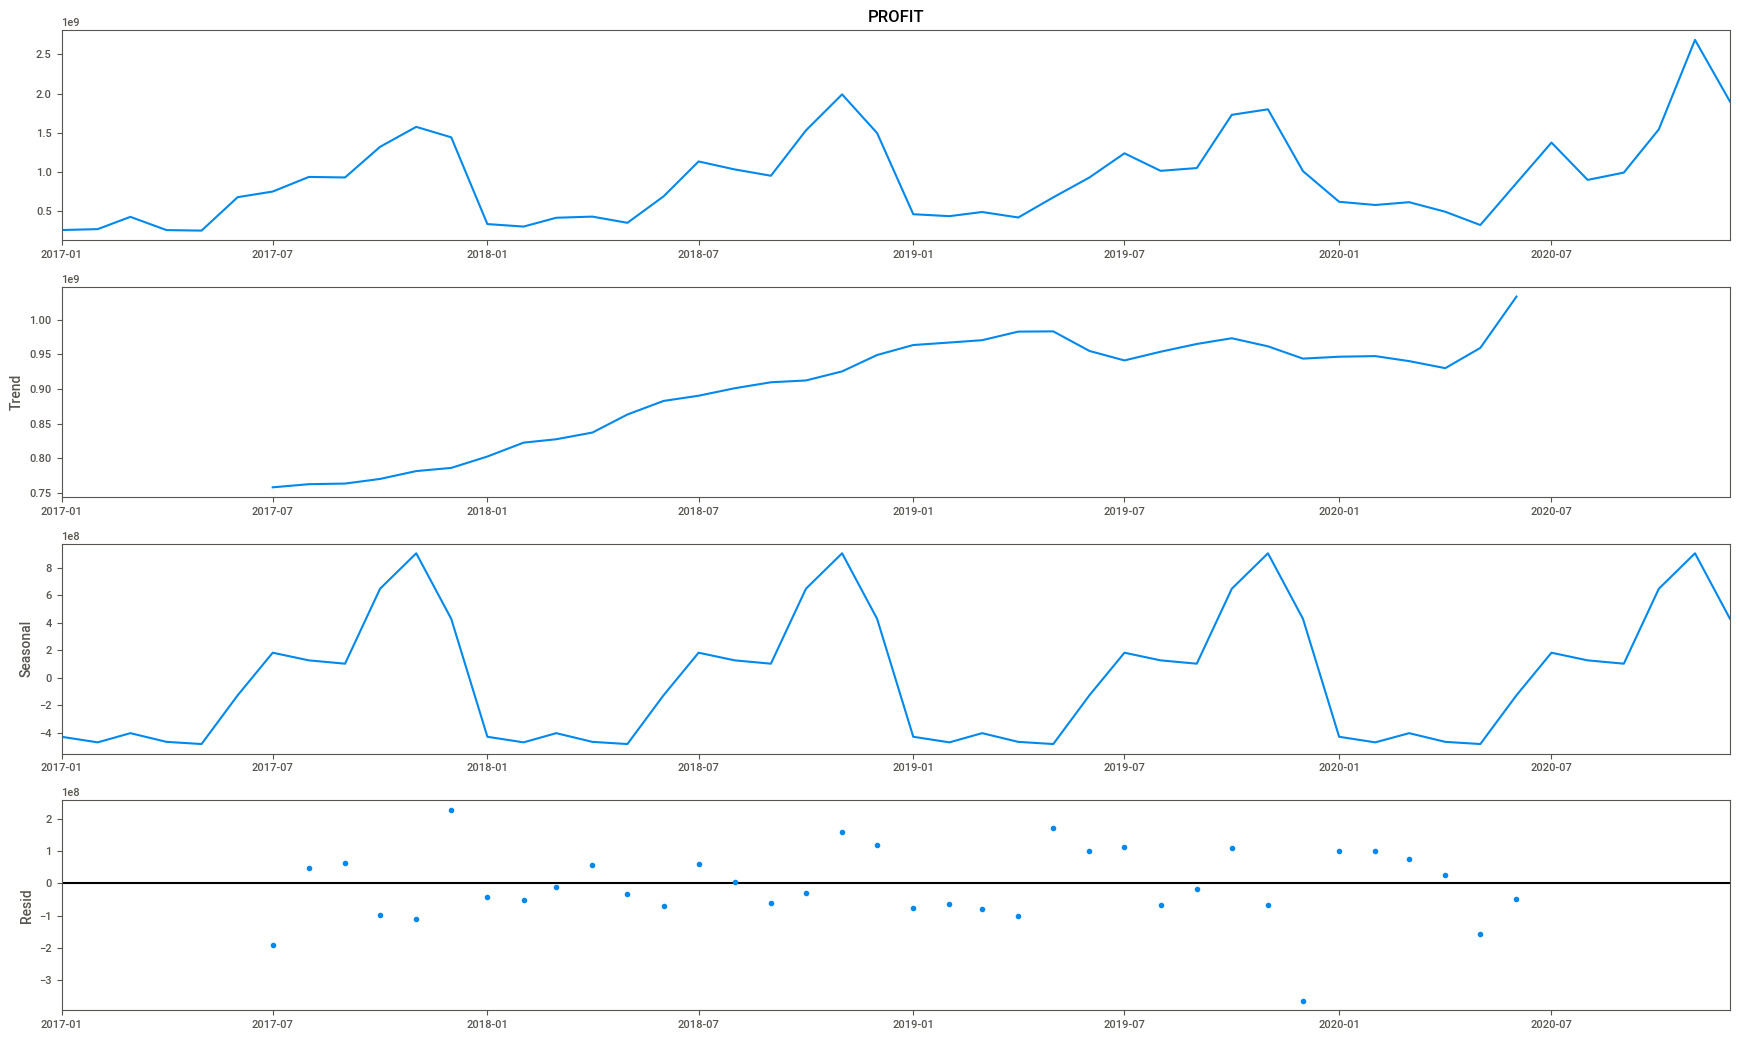

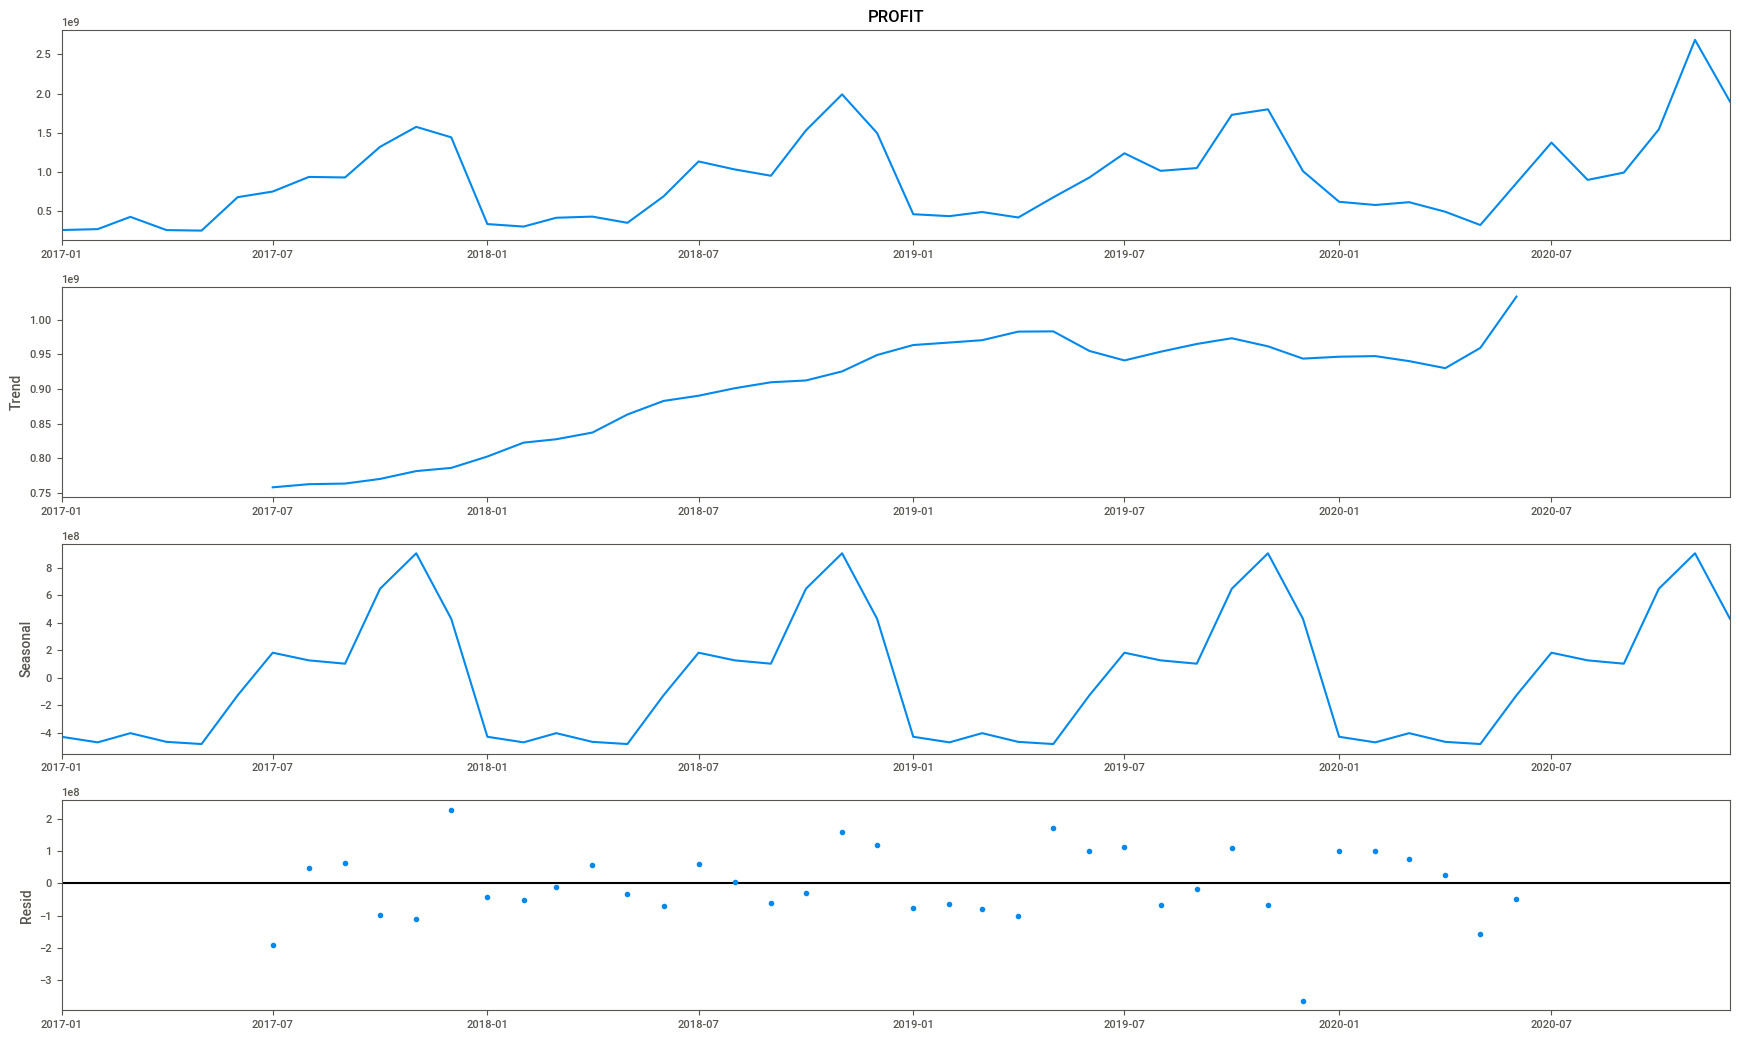

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
results= seasonal_decompose(df["PROFIT"])
results.plot()

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\1075143309.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


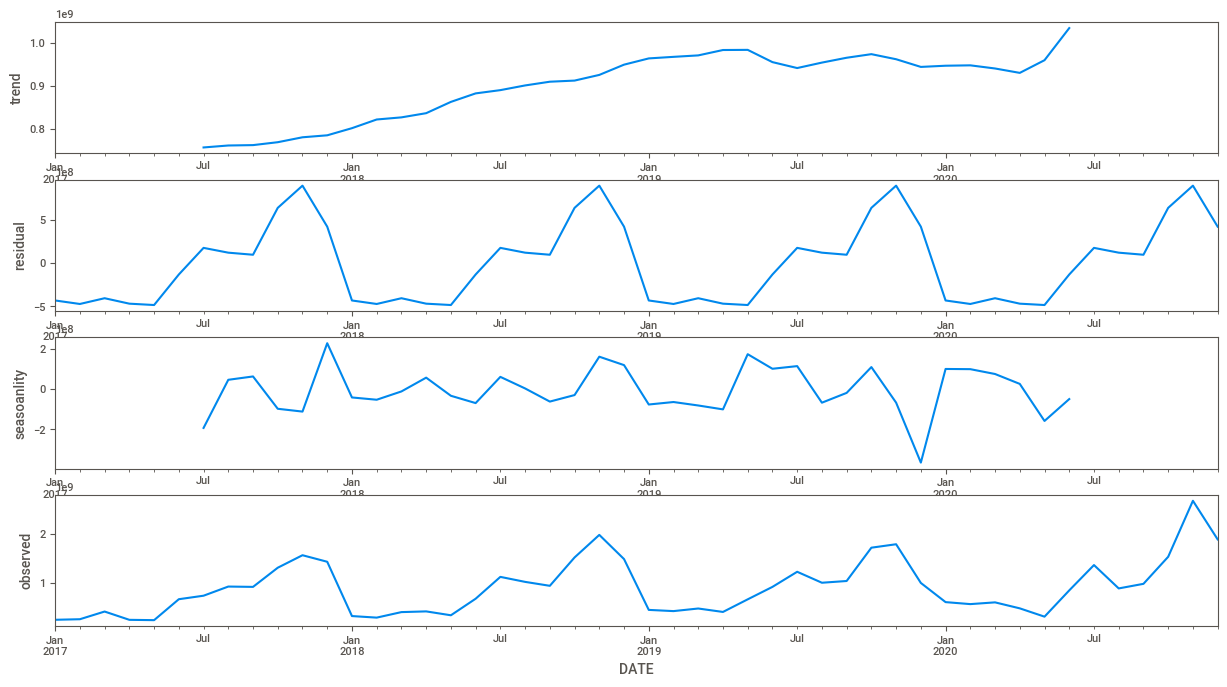

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(df["PROFIT"], model = "additive")

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.seasonal.plot(ax=ax2,ylabel = "residual")
res.resid.plot(ax=ax3,ylabel = "seasoanlity")
res.observed.plot(ax=ax4,ylabel="observed")
plt.show()

#### 4.1.2 Autocorrelation Function and seasonality Analysis of Sinaloa's production

1.-Help us uncover hidden patterns in our data and help us select the correct forecasting methods.
2.-Help identify seasonality in our time series data.
3.-Analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) in conjunction is necessary for selecting the appropriate ARIMA model for any time series prediction.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

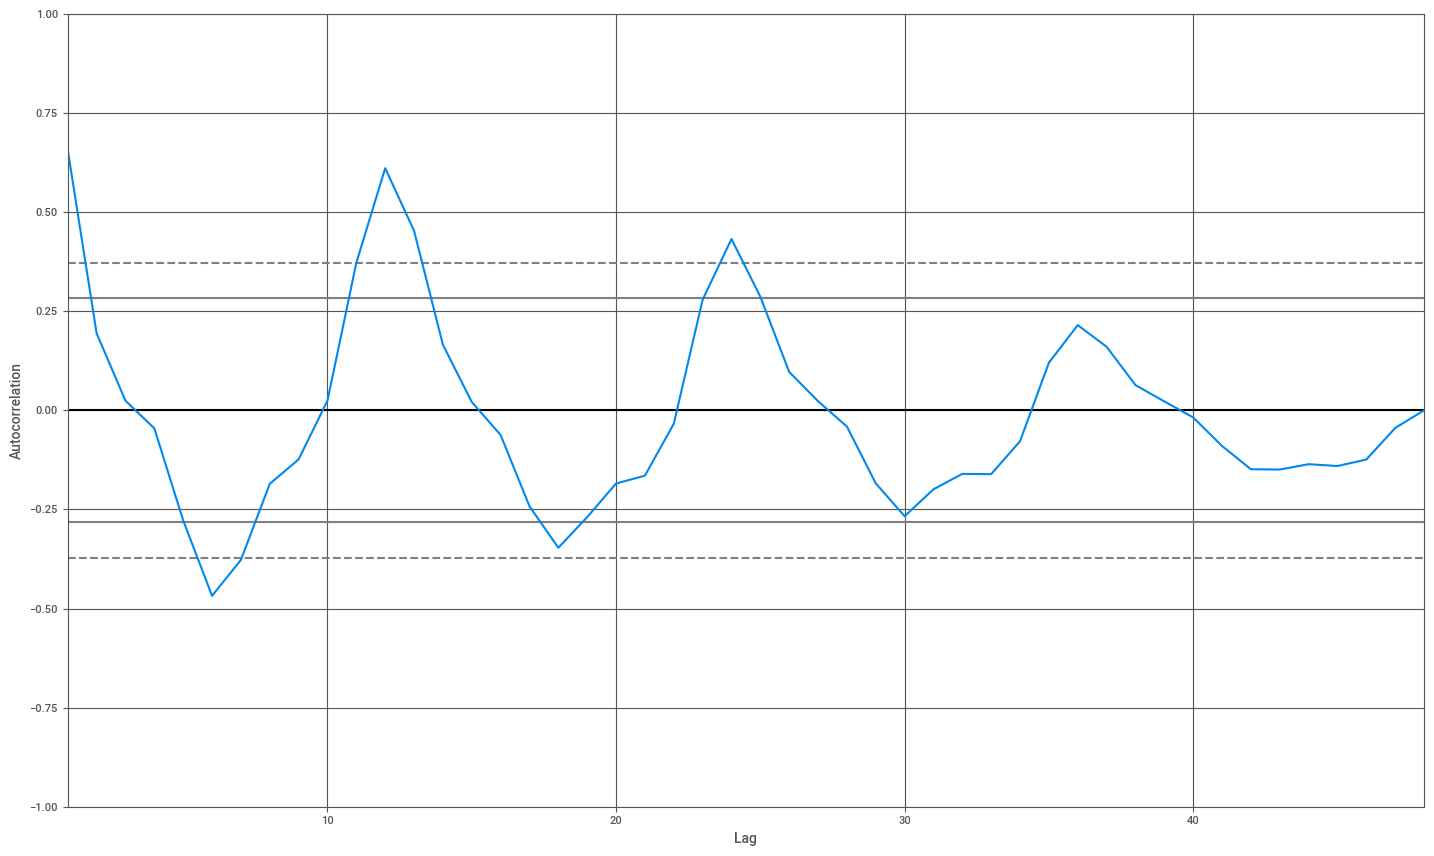

In [33]:
pd.plotting.autocorrelation_plot  

spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
s = sinaloa_production["PROFIT"]

pd.plotting.autocorrelation_plot(s)
#<AxesSubplot:title={'center':'width'}, xlabel='Lag', ylabel='Autocorrelation'>

C:\Users\fer-h\AppData\Local\Temp\ipykernel_30080\367047970.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


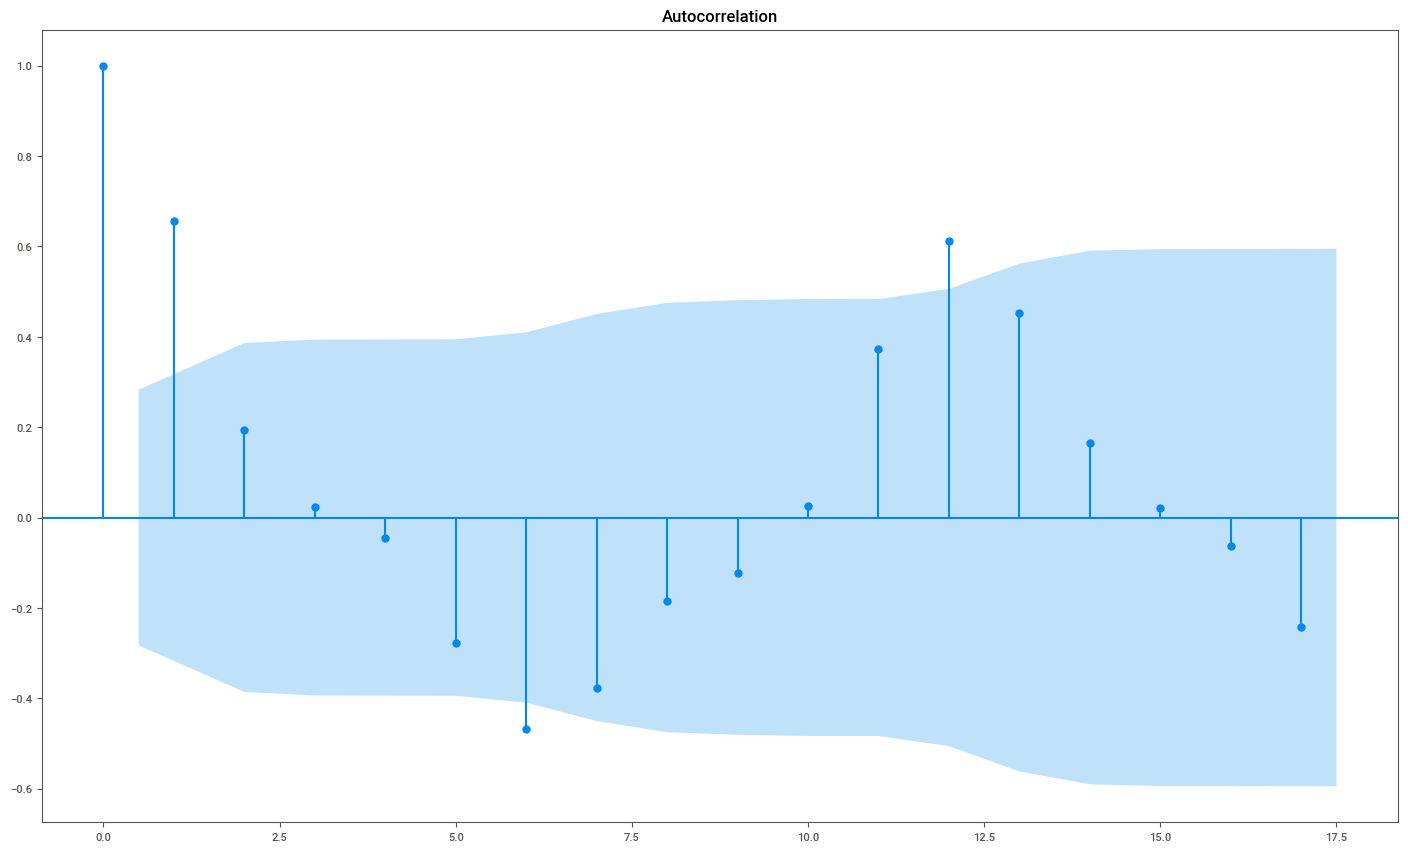

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(s)
plt.show()

<AxesSubplot:xlabel='DATE'>

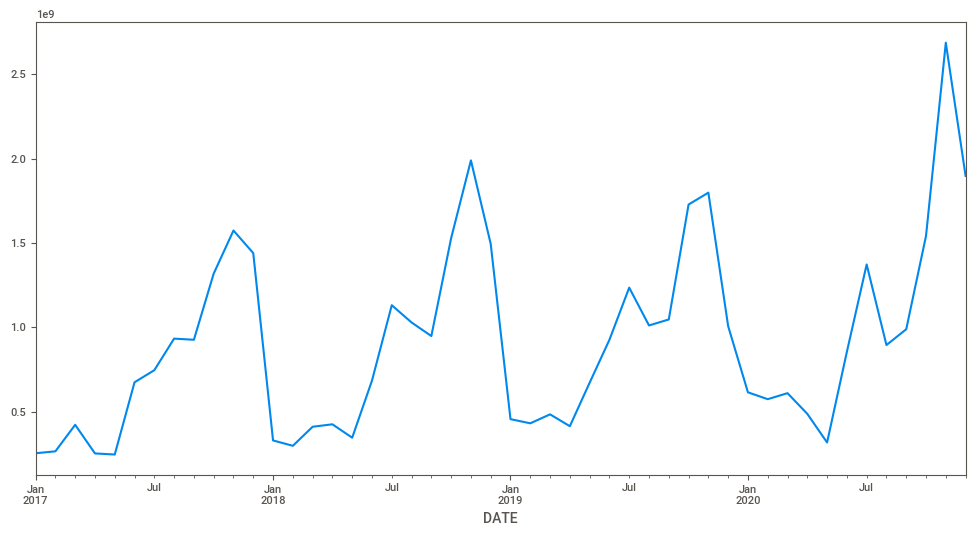

In [35]:
df["PROFIT"].plot(figsize=(12,6))

### 4.2 LSTM RNN (Long Short-Term Memory Recurrent Neural Network)


According to Korstanje in his book, *advance Forecasting with python.* <br>
    *“The LSTM cell adds long-term memory in an even more performant way because it allows even more parameters to be learned. This makes it the most powerful [Recurrent Neural Network] to do forecasting, especially when you have a longer-term trend in your data. LSTMs are one of the state-of-the-art models for forecasting at the moment,”* (2021).
<br>
Recurrent neural network are a type of recurrent neural network that are able of learning order dependece in sequence prediction problems. in general, a recurrent neural network takes context into acount context.
challenges overcome by LSTM are vanishing gradients and exploding gradients (both related to the training of the netwotk)
![Image of internal mechanism of LSTM cell](Images/LSTM.png "Title")
Learning rate and netwotk size are the most cruciable tunable LSTM hyperparameters. <br>
*"We use LSTM when we suspect that a hierarchical decomposition may exist but do not know in advance what this decoposition is"*-- Felix. A Gers et al. Learning to Forget: Continual Prediction with LSTM, 2000.
<br>
LSTM can be used for univariate time series forecasting problems, meaning the prediction of the next value in single sequence


#### 4.2.1 libraries

In [36]:
import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid

pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [58]:
resultsLongterm={'PROFIT':[0.0,0.0,0.0,0.0,0.0,0.0],
     'UNEMBARKED_KG':[0.0,0.0,0.0,0.0,0.0,0.0],
     'LIVE_CAPTURED_KG':[0.0,0.0,0.0,0.0,0.0,0.0]}
resultsLongtermdf = pd.DataFrame(resultsLongterm)
resultsLongtermdf.index = ['Vanilla LSTM MSE', 'Vanilla LSTM MAPE', 'Stacked LSTM MSE', 'Stacked LSTM MAPE',
                          'Bidirectional LSTM MSE', 'Bidirectional LSTM MAPE']

In [39]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler

In order to get reproducible results in forecasting with LSTM, following values are fixed: seed value, 'PYTHONHASHSEED' environment variable, Python's, numpy's and Tensorflow's built-in pseudo-random generators. A new global Tensorflow session is configured.

In [40]:
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

as we are working with an univariate series, the numbe of features is one, for one variable

In [56]:
# split univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of the pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence 
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

size = int(len(df)-30)
#choose a numbe of time steps
n_steps=1
# numbe of features
n_features = 1

#### 4.2.2 Vanilla LSTM 

Model that contains a single hidden layer of LSTM units and an output layer to make predictions

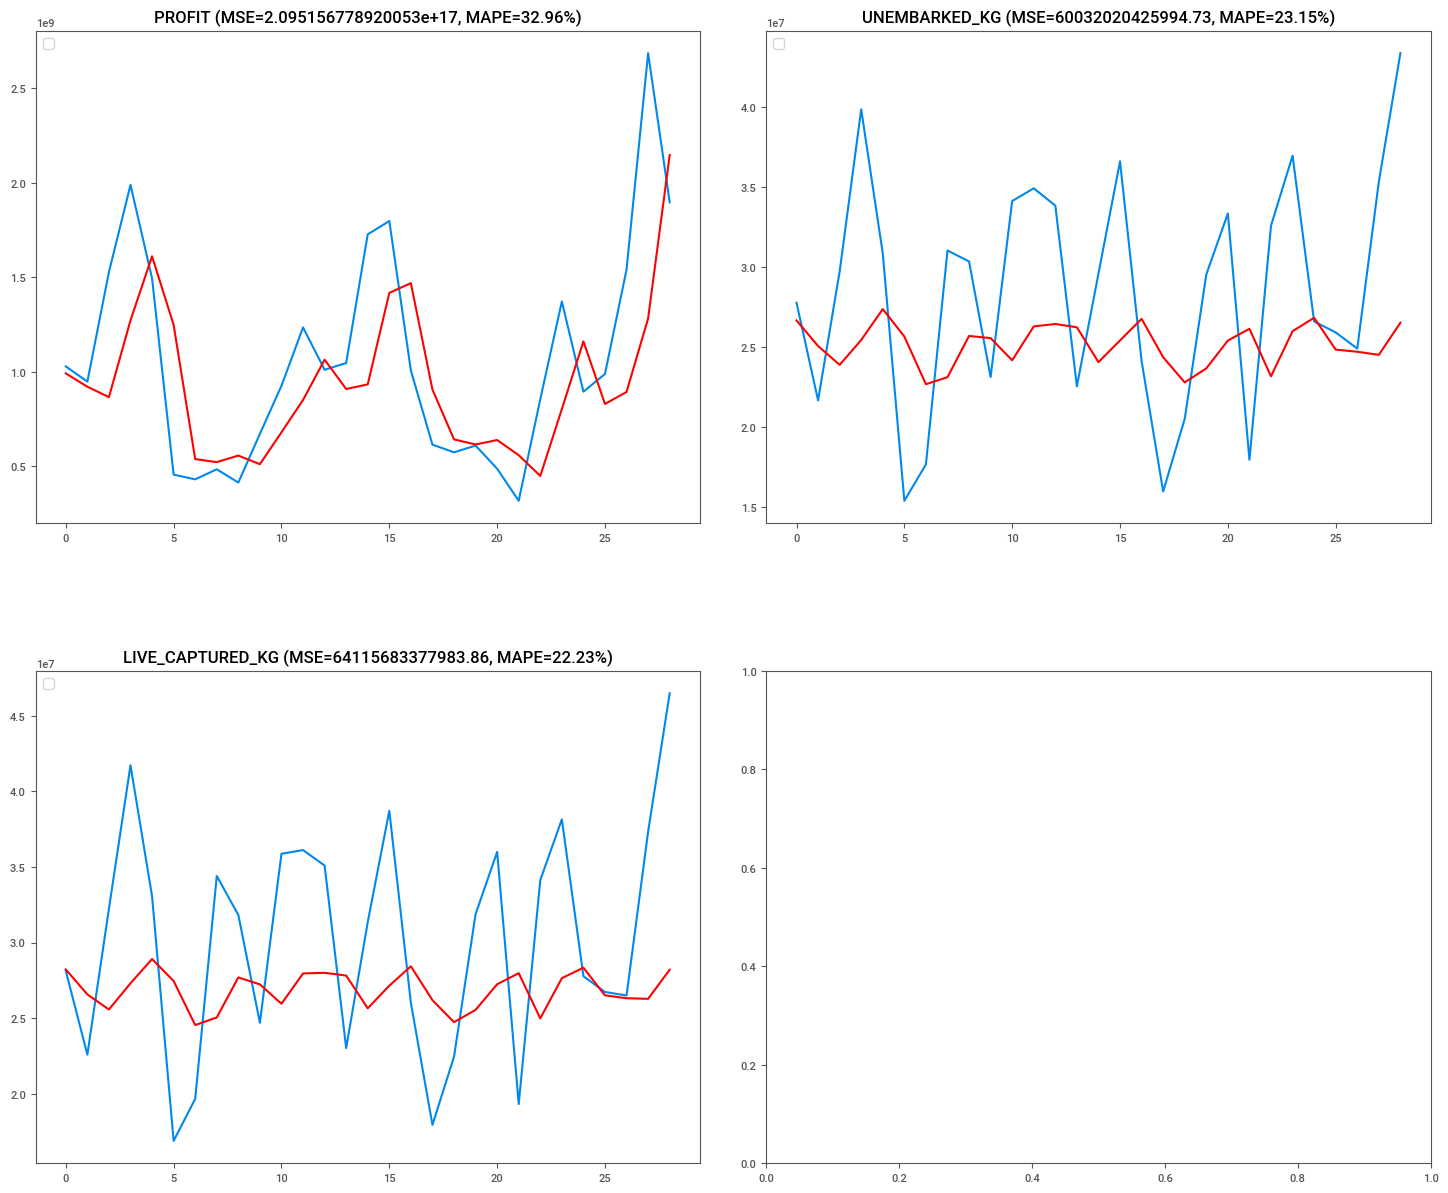

In [59]:

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['PROFIT','UNEMBARKED_KG','LIVE_CAPTURED_KG']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    # MODEL DEFINITION
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=500, verbose=0)
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Vanilla LSTM MSE',x]=error
    resultsLongtermdf.loc['Vanilla LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.2.3 Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another, in a so calle Stacked LSTM model.
<br>
LSTM requires a three-dimensional input and will produce a two dimensional output as an interpretation from the end of the sequence
<br>
we addres this by setting the argument **return_sequence=True** to allow 3D outputs from hidden layers as inputs to the next

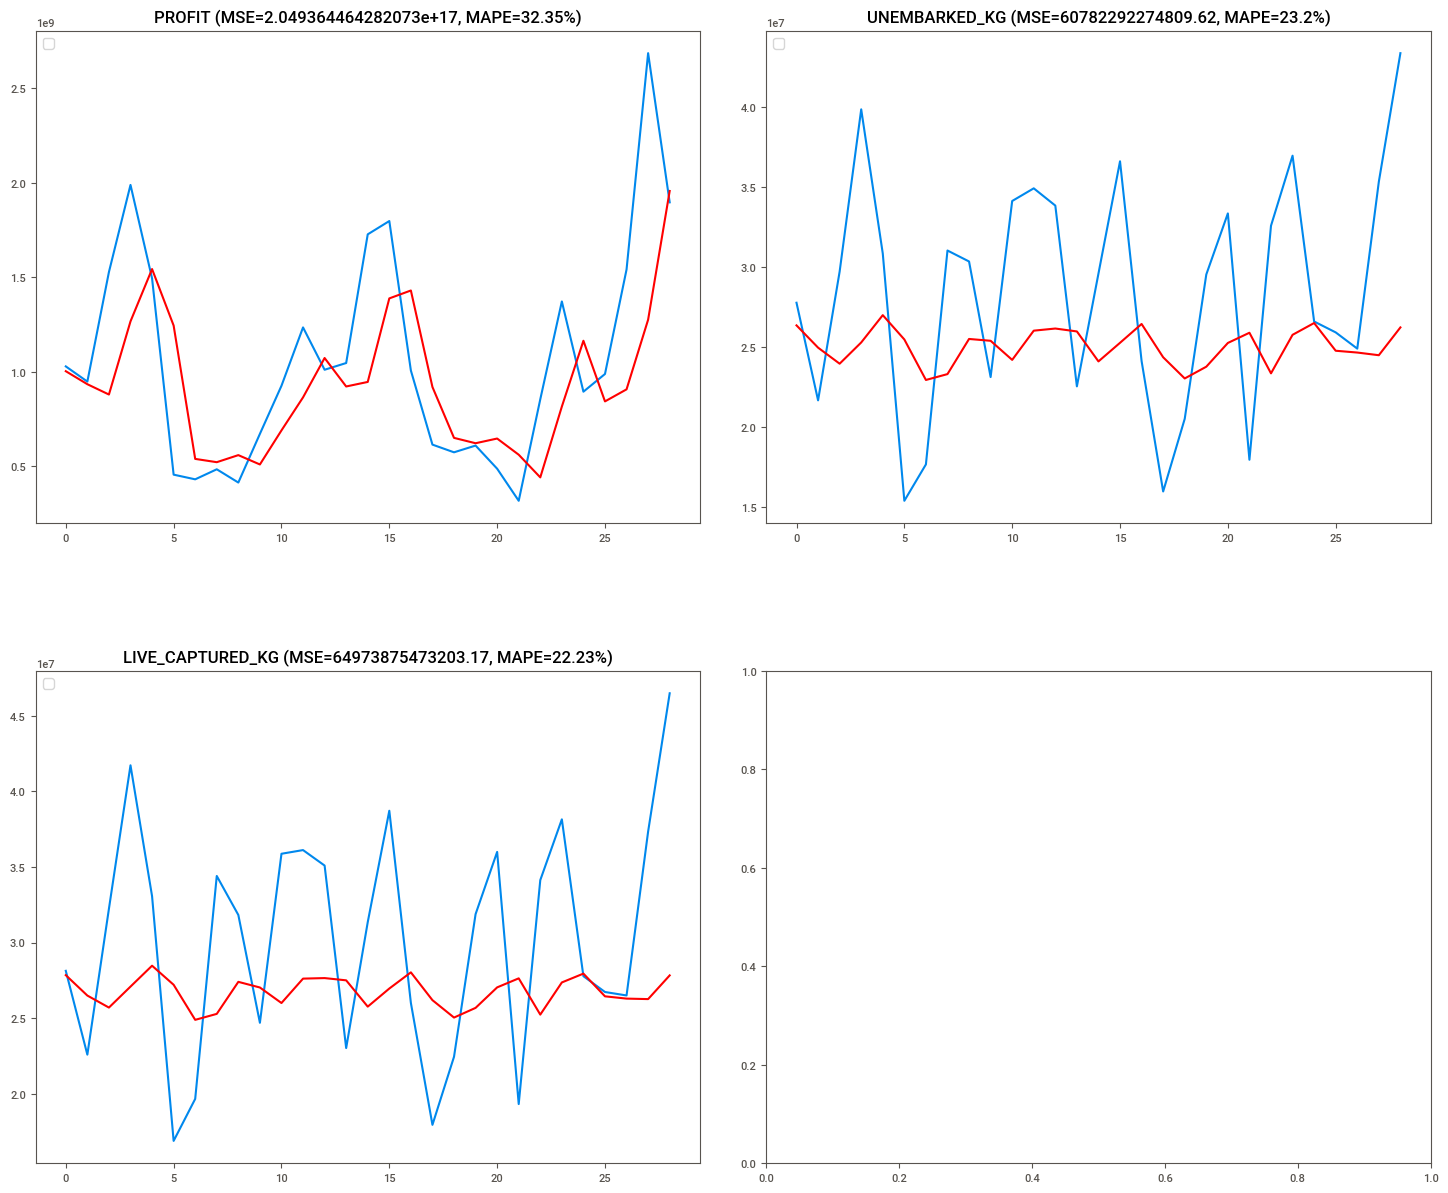

In [60]:

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['PROFIT','UNEMBARKED_KG','LIVE_CAPTURED_KG']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Stacked LSTM MSE',x]=error
    resultsLongtermdf.loc['Stacked LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.4 Bidirectional LSTM

A Biderectional LSTM learns from forward and backwards input and concantenates both interpretations. To do this we wrape the first hidden layer in a wrapper layer called Bidirectional

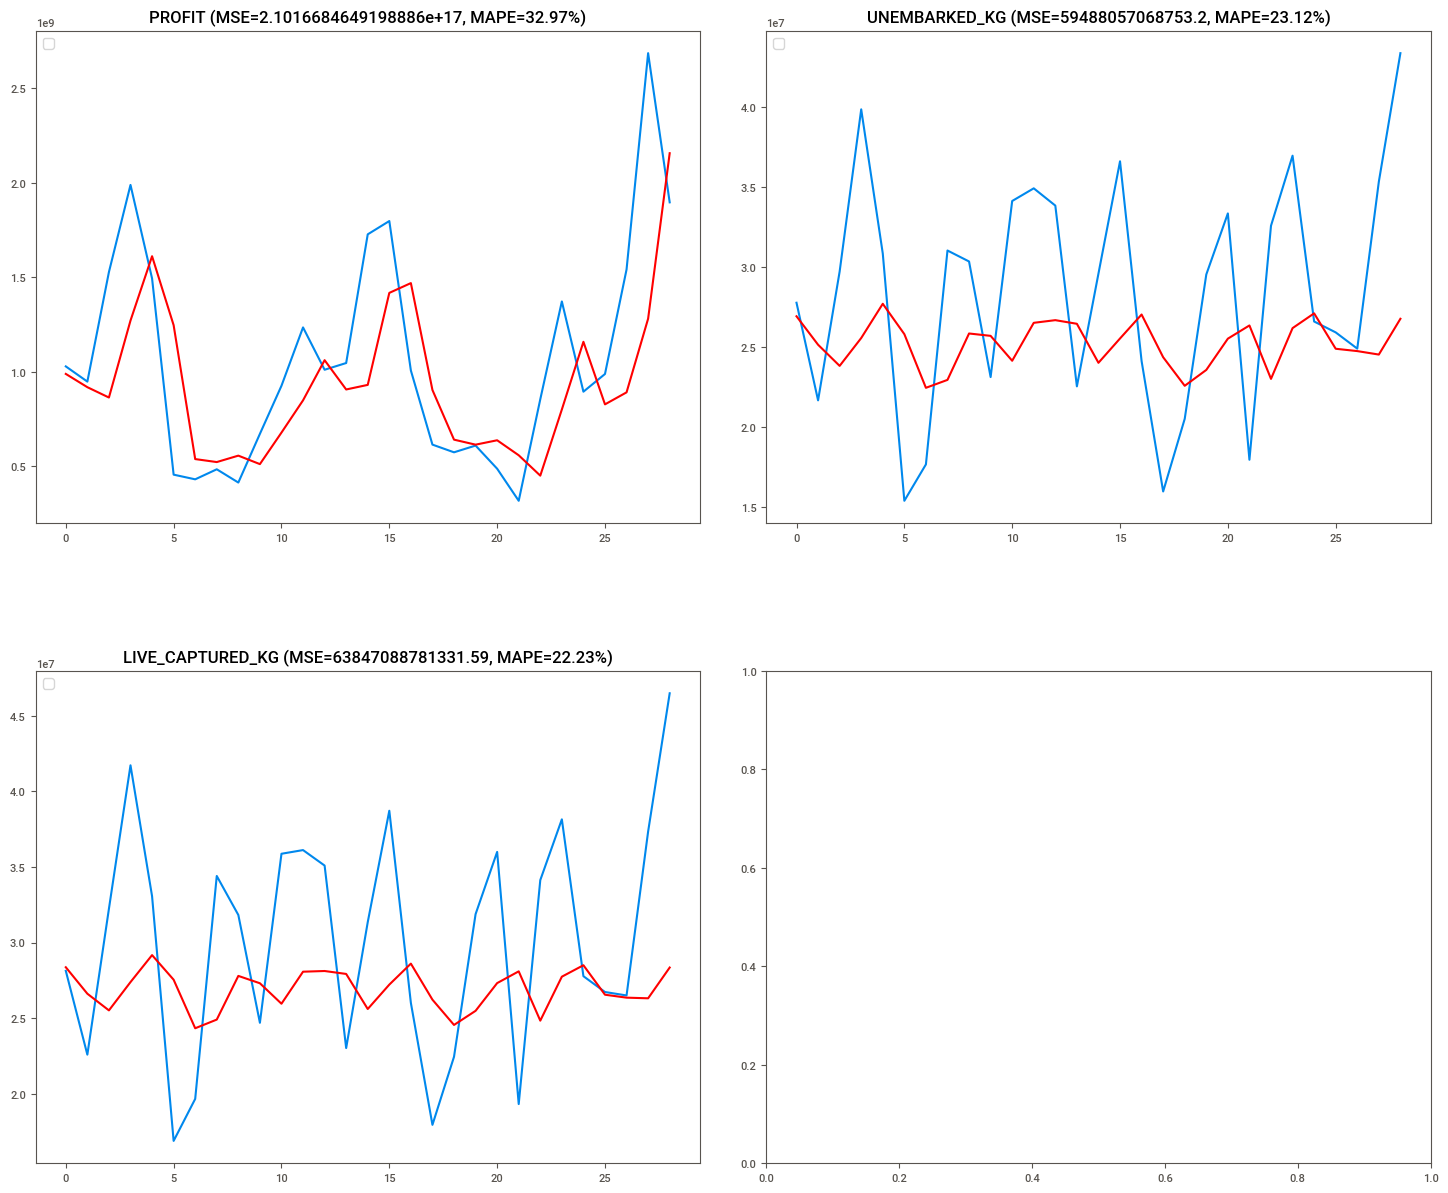

In [61]:

subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['PROFIT','UNEMBARKED_KG','LIVE_CAPTURED_KG']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)

    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Bidirectional LSTM MSE',x]=error
    resultsLongtermdf.loc['Bidirectional LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

## 5. Conclusion

In [62]:
from IPython.display import display, HTML
display(HTML(resultsLongtermdf.to_html()))

 Between the three LSTM models used, Stacked LSTM was the most accurate only by one percent in comparison to the other two models
 What is worth noticing is that even without optimization LSTM models have achived competitive performance according to MAPE values. 
 It is highly likely that the forecasts could be significantly improved by expanding the problem scope to multivariate time series forecasting and by including explanatory variables, such as:
 - Yearly federal monetary support for the state of sinaloa
 - Monthly Sinaloa's littoral zone temperatura as they affect fish production
 <br>
 
 Future work on univariate time series forecasting includes increasing the number of data, exploring different other accuracy metrics, optimization of hyper-parameters for LSTM models and testing other architectures, such as CNN LSTM and ConvLSTM. 

## 6. References

CONAPESCA(2019)Mexican fishing, an activity just as inmense as the sea. Retrived from https://www.gob.mx/conapesca/articulos/la-pesca-mexicana-una-actividad-inmensa-como-el-mar-227722?idiom=es on 2022/07/13

Brownlee Jason(2017). How to decompose time series data into trend and seasonality. Machine learing Mastery. Retrived from https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/ on 2022/07/15

Keith M.(2022).Exploring the LSTM Neural Network Model for Time Series. Towards data science. Retrieved from https://towardsdatascience.com/exploring-the-lstm-neural-network-model-for-time-series-8b7685aa8cf on 2022/07/


Korstanje, J. (2021). LSTM RNNs. In J. Korstanje, Advanced Forecasting with Pyton (p. 243–251). Berkeley, CA: Apress.


